In [1]:
import matplotlib.pyplot as plt
import metric_calculator as mc
from pathlib import Path
# import imp
# imp.reload(mc)
import matplotlib as mpl
# import matplotlib.patches as mpatch
import numpy as np
import joblib as jb
import subprocess as sp
import xml.etree.ElementTree as et
import seaborn as sns
# import json

# Runtime Plot (Fig 14a)

In [5]:
# _path = "../../"
# nanoRuntime = np.array(jb.load(_path+'Runtime/On Nano/Runtime_with_removal/traffic ca_runtime.pkl'))
# piRuntime = np.array(jb.load(_path+'Runtime/On Old_RPi/Runtime/traffic ca_runtime.pkl'))
# # serverCaltime = np.array(jb.load(_path+'Runtime/FromServer/AITr5S1C1__calibtime.pkl'))
# PCRuntime = np.array(jb.load(_path+'Runtime/traffic ca_runtime.pkl'))
# # print(nanoRuntime)
# # print(piRuntime)
# with open(f"{_path}Runtime/On Odroid H3+/runtime_on_odroid_h3+.txt") as f:
#     d = f.read().split("\n")[1:-1]
# OdroidRuntime = [float(j.split(" ")[3][:-1]) for i, j in enumerate(d) if i%2!=0] # Reading odd lines

In [6]:
# # runtime to fps 
# # one seg has 15 frames
# # so, fps = (15/sps, (Here runtimes are n sec, so 15/sps)
# tmp = np.array([15, 15, 15])#,15]) # 15 because 15 frames in a seg and fps = (1*15)/ms_runtime
# arrMean=[(np.mean(tmp[0]/piRuntime, axis=0)[-1]), (np.mean(tmp[0]/nanoRuntime, axis=0)[-1]), (np.mean(tmp[0]/PCRuntime, axis=0)[-1]), (np.mean(tmp[0]/OdroidRuntime))]
# # arrMax=np.array([np.max(piRuntime[-1]), np.max(nanoRuntime[-1]), np.max(PCRuntime[-1])])
# # arrMin=np.array([np.min(piRuntime[-1]), np.min(nanoRuntime[-1]), np.min(PCRuntime[-1])])    

# arrStd=[(np.std(tmp[0]/piRuntime, axis=0)[-1]), (np.std(tmp[0]/nanoRuntime, axis=0)[-1]), (np.std(tmp[0]/PCRuntime, axis=0)[-1]), (np.std(tmp[0]/OdroidRuntime))]
                 
# a = ['On RPi4', 'On Nano', "On Odroid H3+", 'On Desktop']#, 'On Server']

# # _yerr=np.array([[(tmp[0]/arrMean[0]-tmp[0]/arrMax[0]), (tmp[0]/arrMin[0]-tmp[0]/arrMean[0])], [(tmp[1]/arrMean[1]-tmp[1]/arrMax[1]), (tmp[1]/arrMin[1]-tmp[1]/arrMean[1])], [(tmp[2]/arrMean[2]-tmp[2]/arrMax[2]), (tmp[2]/arrMin[2]-tmp[2]/arrMean[2])]]).T
# # print(_yerr.shape)


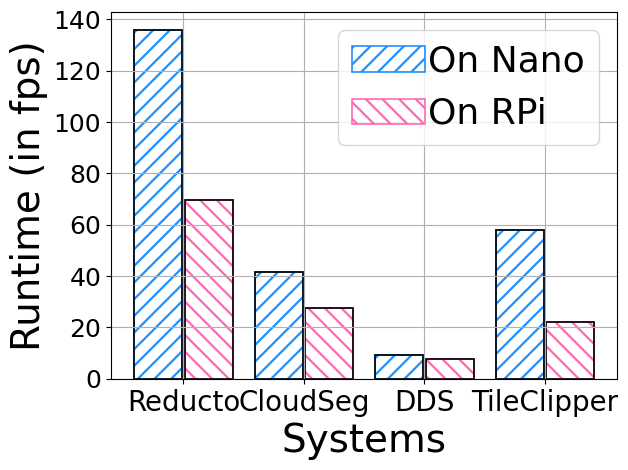

In [5]:
x = [1, 2, 3, 4]
mpl.rcParams['hatch.linewidth'] = 1.6
realtime = 30 

b1 = plt.bar(np.array(x)+0.21, [69.77, 27.74, 7.61, 22.00], width=0.4, label="On RPi", fill=False, linewidth=1.2, edgecolor='hotpink', hatch="\\\\")
plt.bar(np.array(x)+0.21, [69.77, 27.74, 7.61, 22.00], width=0.4, label="On RPi", fill=False, linewidth=1.2, edgecolor='k')
b2 = plt.bar(np.array(x)-0.21, [136, 41.67, 9.14, 57.97], width=0.4, label="On Nano", fill=False, linewidth=1.2, edgecolor='dodgerblue', hatch="//")
plt.bar(np.array(x)-0.21, [136, 41.67, 9.14, 57.97], width=0.4, label="On Nano", fill=False, linewidth=1.2, edgecolor='k')

plt.yticks(fontsize=18)
plt.xticks(x, ["Reducto", "CloudSeg", "DDS","TileClipper",], fontsize=20)
plt.ylabel("Runtime (in fps)", fontsize=28)
plt.xlabel("Systems", fontsize=28)
plt.grid(True)
plt.tight_layout()
plt.legend([b2, b1], ["On Nano", "On RPi"], fontsize=26, handletextpad=0.1)#handlelengtth=0.1)

# plt.savefig("../assets/Plots/Runtime.pdf", bbox_inches='tight')

# Boxplots (Fig 8b, 8c, and 8d)

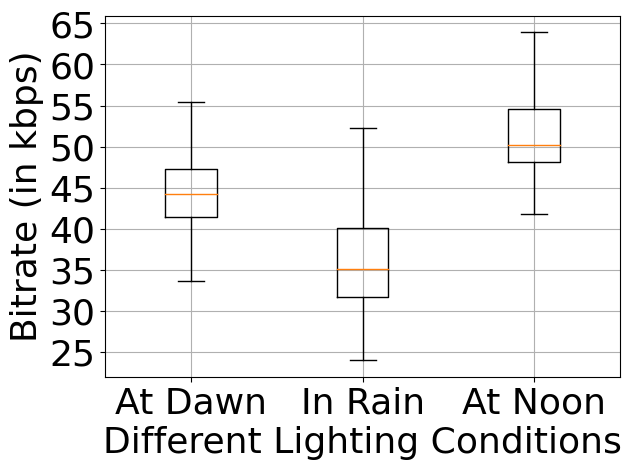

In [6]:
# Weather boxplot
p1 = jb.load("../assets/Bitrates/cam_4dawn_.pkl")
p2 = jb.load("../assets/Bitrates/cam_4rain_.pkl")
p3 = jb.load("../assets/Bitrates/cam_4_a_5m.pkl")

tile = 10
p = np.array([p1[:, tile]/1000, p2[:, tile]/1000, p3[:, tile]/1000])

plt.boxplot([p[0], p[1], p[2]], showfliers=False)
plt.xticks([1,2,3], ['At Dawn', 'In Rain', 'At Noon'], fontsize=26)
plt.yticks(fontsize=26)
plt.xlabel("Different Lighting Conditions", fontsize=26)
plt.ylabel("Bitrate (in kbps)", fontsize=26)
plt.grid()
plt.tight_layout()
# plt.savefig("../assets/Plots/Weather_boxplot.pdf", bbox_inches = 'tight')

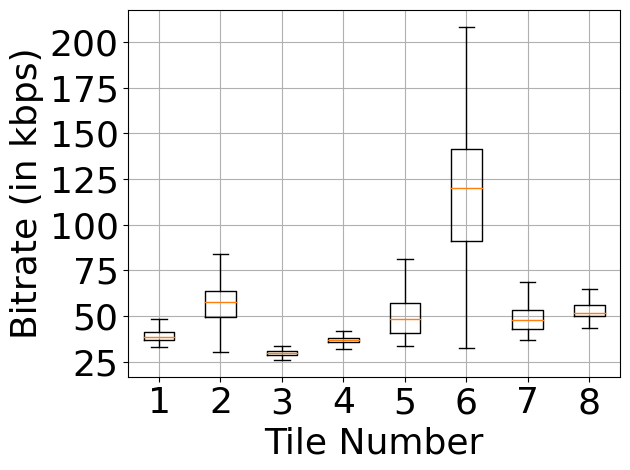

In [7]:
# Tiles boxplot
p = jb.load("../assets/Bitrates/traffic_ca.pkl")
tile = 15

plt.boxplot([p[:, i]/1000 for i in range(8)], showfliers=False)
plt.xticks(np.arange(1,9), [i for i in range(1,9)], fontsize=26)
plt.yticks(fontsize=26)
plt.xlabel("Tile Number", fontsize=26)
plt.ylabel("Bitrate (in kbps)", fontsize=26)
plt.grid()
plt.tight_layout()
# plt.savefig("../assets/Plots/Tiles_boxplot.pdf", bbox_inches = 'tight')

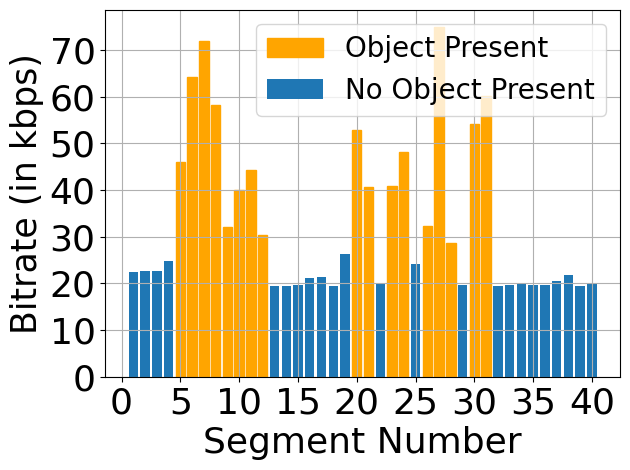

In [8]:
# Plotting bar plot of change in bitrate across segs
p = jb.load("../assets/Bitrates/traffic_ca.pkl")
tile = 14

bar1 = plt.bar([i for i in range(1,41)], p[:40, tile]/1000, label='No Object Present')#, color='b')
colors = {'Object Present': 'green', 'No Object Present': 'blue'}
for i in range(16):
    bar1[5-1].set_color('orange')
    bar1[6-1].set_color('orange')
    bar1[7-1].set_color('orange')
    bar1[8-1].set_color('orange')
    bar1[9-1].set_color('orange')
    bar1[10-1].set_color('orange')
    bar1[11-1].set_color('orange')
    bar1[12-1].set_color('orange')
    bar1[20-1].set_color('orange')
    bar1[21-1].set_color('orange')
    bar1[23-1].set_color('orange')
    bar1[24-1].set_color('orange')
    bar1[26-1].set_color('orange')
    bar1[27-1].set_color('orange')
    bar1[28-1].set_color('orange')
    bar1[30-1].set_color('orange')
    bar1[31-1].set_color('orange')

bar1[5-1].set_label('Object Present')

plt.grid()
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
plt.xlabel("Segment Number", fontsize=26)
plt.ylabel("Bitrate (in kbps)", fontsize=25)
plt.tight_layout()
plt.legend(fontsize=20)
# plt.savefig("../assets/Plots/barplot_object_no_object.pdf", bbox_inches = 'tight')

# Metrics For Static Tile Removal

In [8]:
_path = "../"
datasets = ["AIConditions", "AINormal", "DETRAC", "IndianVideos", "OurRec"] # We refer IndiaVideos as Others dataset in the paper
st_out = []    
yerr_st = []
st_out_dict = {}
for d in datasets:
    tmp = []
    l = 0
    st_tmp_dict = {}
    if d == "IndianVideos":
        tmp = jb.load("../videos/Baselines/StaticTileRemoval/StaticallyRemovedTiles/IndianVideos/fileSizes.pkl")
    else:
        for video in Path(_path+"videos/"+d+"/tiled_4x4_mp4").iterdir():
            l += 1
            compare = mc.CaculateMetrics(d, video.stem, "Static")
            if Path(_path+"baselines/StaticTileRemoval/StaticallyRemovedLabels/"+video.stem+".txt").exists():
                # print(f"For {d}/{video.name} >>>>>>>>>>>>>>>>>>>>>\n")
                accu, f1, prec, recall = compare.calc_metrics()
                qp_saving, actual_saving, total_saving = compare.calc_savings()
                st_tmp_dict.update({video.name: [accu, f1, prec, recall, qp_saving, actual_saving, total_saving]}) 
            else:
                qp_saving, actual_saving, total_saving = compare.calc_savings()
                accu, f1, prec, recall  = 1, 1, 1, 1
                st_tmp_dict.update({video.name: [accu, f1, prec, recall, qp_saving, actual_saving, total_saving]})
            tmp.append([accu, f1, prec, recall, qp_saving, actual_saving, total_saving])

    st_out_dict[d] = st_tmp_dict
    tmp = np.array(tmp)
    
    # # Dumps filesize of the IndianVideos
    # if d == "IndianVideos":
    #     jb.dump(tmp, "../videos/Baselines/StaticTileRemoval/StaticallyRemovedTiles/IndianVideos/fileSizes.pkl")

    yerr_st.append(np.std(tmp, axis=0))
    st_out.append(tmp.mean(axis=0))
st_out = np.array(st_out)
yerr_st = np.array(yerr_st)
_st_out = st_out.copy()
_st_out[1,:] = (_st_out[0, :] + _st_out[1, :])/2
_st_out[0,:] = np.zeros(_st_out.shape[1])

# Metrics For TileClipper

In [9]:
_path = "../"
datasets = ["AIConditions", "AINormal", "DETRAC", "IndianVideos", "OurRec"]
tileClipper_out = []
yerr_tileClipper = []
tileClipper_out_dict = {}
for d in datasets:
    tmp = []
    l = 0
    tileClipper_tmp_dict = {}
    if d == "IndianVideos":
        tmp = jb.load("../videos/IndianVideos/fileSizes.pkl")
    else:
        for video in Path(_path+"videos/"+d+"/tiled_4x4_mp4").iterdir():
            l += 1
            compare = mc.CaculateMetrics(d, video.stem, "TileClipper")
            # print(f"For {d}/{video.name} >>>>>>>>>>>>>>>>>>>>>\n")
            accu, f1, prec, recall = compare.calc_metrics()
            # compare.print_difference()
            qp_saving, actual_saving, total_saving = compare.calc_savings()
            tileClipper_tmp_dict.update({video.name: [accu, f1, prec, recall, qp_saving, actual_saving, total_saving]})
            tmp.append([accu, f1, prec, recall, qp_saving, actual_saving, total_saving])
        tileClipper_out_dict[d] = tileClipper_tmp_dict
        tmp = np.array(tmp)

    # # Dumps filesize of the IndianVideos
    # if d == "IndianVideos":
    #     jb.dump(tmp, "../videos/IndianVideos/fileSizes.pkl")

    yerr_tileClipper.append(np.std(tmp, axis=0))
    tileClipper_out.append(tmp.mean(axis=0))
tileClipper_out = np.array(tileClipper_out)
yerr_tileClipper = np.array(yerr_tileClipper)
_tileClipper_out = tileClipper_out.copy()
_tileClipper_out[1,:] = (_tileClipper_out[0, :] + _tileClipper_out[1, :])/2 # adding AICondition and AINormal
_tileClipper_out[0,:] = np.zeros(_tileClipper_out.shape[1])

In [23]:
# # Precision and Recal in less and high traffic
# low_traf = ["MVI_39781", "MVI_39761", "MVI_40991", "MVI_40992", "MVI_40962", "MVI_40963", "MVI_40732", "MVI_63521"]
# lp, lr, hp, hr = [], [], [], []
# for k in tileClipper_out_dict["DETRAC"].keys():
#     # print(k)
#     if k in low_traf:
#         # print(k)
#         lp.append(tileClipper_out_dict["DETRAC"][k][2])
#         lr.append(tileClipper_out_dict["DETRAC"][k][3])
#     else:
#         # print(k, "else")
#         hp.append(tileClipper_out_dict["DETRAC"][k][2])
#         hr.append(tileClipper_out_dict["DETRAC"][k][3]) 

# print([np.mean(lp), np.mean(lr), np.mean(hp), np.mean(hr)])

# Metrics For CloudSeg

In [10]:
_path = "../"
datasets = ["AIConditions", "AINormal", "DETRAC", "IndianVideos", "OurRec"]

cloudS_out = []
yerr_cloudS = []
cloudS_out_dict = {}
for d in datasets:
    tmp = []
    l = 0
    cloudS_tmp_dict = {}
    if d == "IndianVideos":
        tmp = jb.load("../videos/Baselines/CloudSeg/fileSizes.pkl")
    else:
        for video in Path(_path+"videos/"+d+"/tiled_4x4_mp4").iterdir():
            l += 1
            compare = mc.CaculateMetrics(d, video.stem, "CloudSeg")
            # print(f"For {d}/{video.name} >>>>>>>>>>>>>>>>>>>>>\n")
            accu, f1, prec, recall = compare.calc_metrics()
            # compare.print_difference()
            qp_saving, actual_saving, total_saving = compare.calc_savings()
            cloudS_tmp_dict.update({video.name: [accu, f1, prec, recall, qp_saving, actual_saving, total_saving]})
            tmp.append([accu, f1, prec, recall, qp_saving, actual_saving, total_saving])
        cloudS_out_dict[d] = cloudS_tmp_dict
        tmp = np.array(tmp)
    
    # # Dumps filesize of the IndianVideos
    # if d == "IndianVideos":
    #     jb.dump(tmp, "../videos/Baselines/CloudSeg/fileSizes.pkl")

    yerr_cloudS.append(np.std(tmp, axis=0))
    cloudS_out.append(tmp.mean(axis=0))
cloudS_out = np.array(cloudS_out)
yerr_cloudS = np.array(yerr_cloudS)
_cloudS_out = cloudS_out.copy()
_cloudS_out[1,:] = (_cloudS_out[0, :] + _cloudS_out[1, :])/2
_cloudS_out[0,:] = np.zeros(_cloudS_out.shape[1])

# Metrics For DDS

In [11]:
_path = "../"
datasets = ["AIConditions", "AINormal", "DETRAC", "IndianVideos", "OurRec"]
dds_out = []
yerr_dds = []
dds_out_dict = {}
for d in datasets:
    tmp = []
    l = 0
    dds_tmp_dict = {}
    if d == "IndianVideos":
        tmp = jb.load("../videos/Baselines/DDS/fileSizes.pkl")
    else:
        for video in Path(_path+"videos/"+d+"/tiled_4x4_mp4").iterdir():
            l += 1
            compare = mc.CaculateMetrics(d, video.stem, "DDS")
            # print(f"For {d}/{video.name} >>>>>>>>>>>>>>>>>>>>>\n")
            accu, f1, prec, recall = compare.calc_metrics()
            # accu, f1, prec, recall = 0, 0, 0
            qp_saving, actual_saving, total_saving = compare.calc_savings()
            dds_tmp_dict.update({video.name: [accu, f1, prec, recall, qp_saving, actual_saving, total_saving]})
            tmp.append([accu, f1, prec, recall, qp_saving, actual_saving, total_saving])
        dds_out_dict[d] = dds_tmp_dict
        tmp = np.array(tmp)

    # # Dumps filesize of the IndianVideos
    # if d == "IndianVideos":
    #     jb.dump(tmp, "../videos/Baselines/DDS/fileSizes.pkl")

    yerr_dds.append(np.std(tmp, axis=0))
    dds_out.append(tmp.mean(axis=0))
dds_out = np.array(dds_out)
yerr_dds = np.array(yerr_dds)
_dds_out = dds_out.copy()
_dds_out[1,:] = (_dds_out[0, :] + _dds_out[1, :])/2
_dds_out[0,:] = np.zeros(_dds_out.shape[1])

In [12]:
# Saving of both first and second phase combined
# Dataset
# All values are from the excel sheet in the baselines/DDS folder
_dds_saving = np.array([36.24, 16.72, 6.91, 17.56]) # AICC, DETRAC, Others, OurRec
yerr_dds_saving = np.array([8.95, 24.35, 15.20, 7.94])

# Weather
_dds_saving_weather = np.array([28.67, 30.02, 29.72])
yerr_dds_weather = np.array([8.22, 9.35, 12.07])

# Metrics For Reducto

In [13]:
# All values are from the excel sheet in the baselines/Reducto folder
# AICC, DETRAC, IndianVideos, OurRec
reducto_out_metric = np.array([0.82, 0, 0.77, 0.8433])
yerr_reducto_metric = np.array([0.1257, 0, 0.128 , 0.129])

# savings
reducto_saving = np.array([33.728, 0, 16, 22])
yerr_reducto_saving = np.array([0.15231, 0, 0.2943, 0.1812])

# Aggregating all videos' metrics

In [28]:
DATASET = ["AIConditions", "AINormal", "DETRAC", "IndianVideos", "OurRec"]

In [24]:
all_accu_tileClipper, all_saving_tileClipper = [], []
all_accu_dds, all_saving_dds = [], []
all_accu_cs, all_saving_cs = [], []
all_accu_st, all_saving_st = [], []
all_accu_reducto, all_saving_reducto = [], []
for dd in DATASET:
    for d in dds_out_dict[dd].values():
        all_accu_dds.append(d[0])
        all_saving_dds.append(d[5])

    for d in tileClipper_out_dict[dd].values():
        all_accu_tileClipper.append(d[0])
        all_saving_tileClipper.append(d[5])

    for d in st_out_dict[dd].values():
        all_accu_st.append(d[0])
        all_saving_st.append(d[5])

    for d in cloudS_out_dict[dd].values():
        all_accu_cs.append(d[0])
        all_saving_cs.append(d[5])

# Reducto
for d in range(len(reducto_out_metric)):
    if d == 1:
        continue
    all_accu_reducto.append(reducto_out_metric[d])
    all_saving_reducto.append(reducto_saving[d])

# Metrics For Live Videos

In [95]:
dataset = "live_videos"
live_out = []
yerr_live = []
live_out_dict = {}
l = 0

# For live 30fps video
compare = mc.CaculateMetrics(dataset, "day1-live2-post-cal", "TileClipper")
accu1, f11, prec1, recall1, a_yerr1, f_yerr1, p_yerr1, r_yerr1 = compare.calc_metrics_individual("../assets/GroundTruths/day1-live2-post-cal.txt", "../assets/labels/TileClipper/day1-live2-post-cal.txt", 15, 60)
# qp_saving1, actual_saving1, as_yerr1, total_saving1 = compare.calc_saving_individual("../../live_videos/tiled_4x4_mp4/day1-live2-post-cal/", "../../live_videos/removedTileMp4/day1-live2-post-cal/", 60)
# jb.dump([qp_saving1, actual_saving1, as_yerr1, total_saving1], "../videos/live_videos/day1-live2-post-cal.pkl")
qp_saving1, actual_saving1, as_yerr1, total_saving1 = jb.load("../videos/live_videos/day1-live2-post-cal.pkl")
live_out_dict.update({"day1-live2-post-cal": [accu1, f11, prec1, recall1, a_yerr1, f_yerr1, p_yerr1, r_yerr1, qp_saving1, actual_saving1, as_yerr1, total_saving1]})

# For live 10fps video
compare = mc.CaculateMetrics(dataset, "day1-live4-10fps", "TileClipper")
accu2, f12, prec2, recall2, a_yerr2, f_yerr2, p_yerr2, r_yerr2 = compare.calc_metrics_individual("../assets/GroundTruths/day1-live4-10fps.txt", "../assets/labels/TileClipper/day1-live4-10fps.txt", 5, 60)
# qp_saving2, actual_saving2, as_yerr2, total_saving2 = compare.calc_saving_individual("../../live_videos/tiled_4x4_mp4/day1-live4-10fps/", "../../live_videos/removedTileMp4/day1-live4-10fps/", 60)
# jb.dump([qp_saving2, actual_saving2, as_yerr2, total_saving2], "../videos/live_videos/day1-live4-10fps.pkl")
qp_saving2, actual_saving2, as_yerr2, total_saving2 = jb.load("../videos/live_videos/day1-live4-10fps.pkl")
live_out_dict.update({"day1-live4-10fps": [accu2, f12, prec2, recall2, a_yerr2, f_yerr2, p_yerr2, r_yerr2, qp_saving2, actual_saving2, as_yerr2, total_saving2]})

# Plots

In [96]:
patterns = ["\\\\", "//", "xx", "++", 'oo'] # TileClipper, Reducto, DDS, CloudSeg
colors = ['dodgerblue', "hotpink", "green", 'dimgrey', "orange"]
DATASET = ["AICC21", "DETRAC", "Others", "OurRec"]
Methods = ["TileClipper", "DDS", "CloudSeg", "Reducto", "StaticTileRemoval"]

# Plot for live setup (Fig 16c)

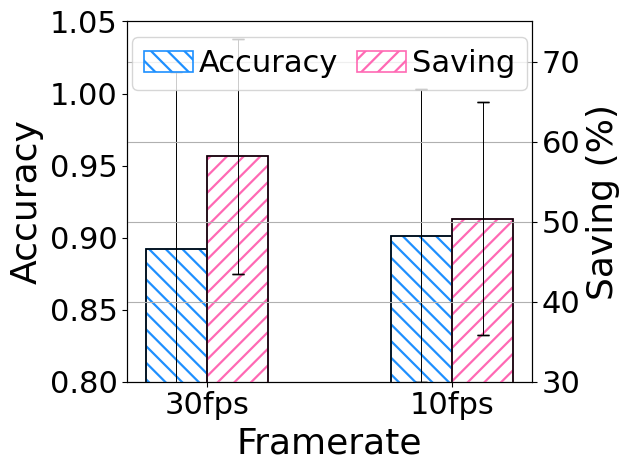

In [97]:
# Accuracy and Savings

# Live Experiment Plots
mpl.rcParams['hatch.linewidth'] = 1.6
ax1 = plt.gca()
ax2 = ax1.twinx()
b1 = ax1.bar([0.75, 2.75], [live_out_dict['day1-live2-post-cal'][0], live_out_dict['day1-live4-10fps'][0]], fill=False, linewidth=1.2, edgecolor='dodgerblue', hatch="\\\\", width=0.5, yerr=[live_out_dict['day1-live2-post-cal'][4], live_out_dict['day1-live4-10fps'][4]], capsize=4, error_kw=dict(elinewidth=0.6))
ax1.bar([0.75, 2.75], [live_out_dict['day1-live2-post-cal'][0], live_out_dict['day1-live4-10fps'][0]], fill=False, linewidth=1.2, edgecolor='k',  width=0.5, yerr=[live_out_dict['day1-live2-post-cal'][4], live_out_dict['day1-live4-10fps'][4]], capsize=4, error_kw=dict(elinewidth=0.6))
b2 = ax2.bar([1.25, 3.25], [live_out_dict['day1-live2-post-cal'][9], live_out_dict['day1-live4-10fps'][9]], fill=False, linewidth=1.2, edgecolor='hotpink', hatch="//", width=0.5, yerr=[live_out_dict['day1-live2-post-cal'][10], live_out_dict['day1-live4-10fps'][10]], capsize=4, error_kw=dict(elinewidth=0.6))
ax2.bar([1.25, 3.25], [live_out_dict['day1-live2-post-cal'][9], live_out_dict['day1-live4-10fps'][9]], fill=False, linewidth=1.2, edgecolor='k', width=0.5, yerr=[live_out_dict['day1-live2-post-cal'][10], live_out_dict['day1-live4-10fps'][10]], capsize=4, error_kw=dict(elinewidth=0.6))
ax1.set_ylabel("Accuracy", fontsize=26)
# b1.get_children()[0].set(ec="k")
# ax1.set_hatch_color("k")
ax2.set_ylabel("Saving (%)", fontsize=26)
ax1.set_xlabel("Framerate", fontsize=26)
ax1.tick_params(labelsize=22)
ax2.tick_params(labelsize=22)
ax1.set_ylim(0.8, 1.05)
ax2.set_ylim(30, 75)
plt.xticks([1, 3], ["30fps", "10fps"], fontsize=22)
plt.grid(True, axis="y", which="major", zorder=-1)
plt.tight_layout()
l = plt.legend([b1, b2], ["Accuracy", 'Saving'], fontsize=22, ncol=2, loc='upper center', columnspacing=0.6, handletextpad=0.2, handlelength=1.6)
# plt.savefig("../assets/Plots/LiveMetric_axis_colored.pdf", bbox_inches = 'tight')

# Peformance metrics plots for TileClipper

**Tradeoff Plots**

Accuracy vs Saving plot for all videos (Fig 12a)

In [14]:
# Mean across all videos
_colors = ['dodgerblue', "dimgrey", "hotpink", "limegreen", "darkorange"]
_Methods = ["TileClipper", "Reducto", "DDS", "StaticTile\nRemoval", "CloudSeg"]
_markers = ["o", "d", "*", "v", ">"]

In [15]:
# Using mean of datasets
accus_v = list(_tileClipper_out[1:, 0])
accus_d = list(_dds_out[1:, 0])
accus_c = list(_cloudS_out[1:, 0])
accus_r = list(reducto_out_metric[:])
accus_s = list(_st_out[1:, 0])

sv_v  = list(_tileClipper_out[1:, 5])
sv_d = list(_dds_saving[:])
sv_c = list(_cloudS_out[1:, 5])
sv_r = list(reducto_saving[:])
sv_s = list(_st_out[1:, 5])

ac_all_m = [np.mean(accus_v), np.mean(accus_r), np.mean(accus_d), np.mean(accus_s), np.mean(accus_c)]
sv_all_m = [np.mean(sv_v), np.mean(sv_r), np.mean(sv_d), np.mean(sv_s), np.mean(sv_c)]

ac_all_s = [np.std(accus_v), np.std(accus_r), np.std(accus_d), np.std(accus_s), np.std(accus_c)]
sv_all_s = [np.std(sv_v), np.std(sv_r), np.std(sv_d), np.std(sv_s), np.std(sv_c)]

# GPU use
comp_all = [0.5, 10, 25, 0, 25] # in minutes tileclipper = 30/60

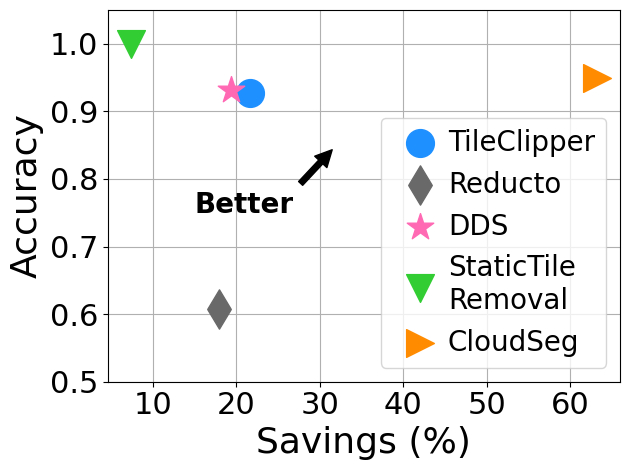

In [16]:
# Accu
# Using mean of datasets
for i in range(len(_Methods)):
    plt.scatter(sv_all_m[i], ac_all_m[i], color=_colors[i], marker=_markers[i], label=_Methods[i], zorder=2, s=400)
ax = plt.gca()

ax.annotate("Better", fontweight="bold", xy=(32, 0.85), xytext=(15, 0.75), fontsize=20, arrowprops=dict(facecolor="black", shrink=0.1))

plt.xlabel("Savings (%)", fontsize=26)
plt.ylabel("Accuracy", fontsize=26)
plt.yticks(fontsize=22)
plt.xticks(fontsize=22)
plt.grid(True)
plt.ylim(0.5, 1.05)
plt.tight_layout()
plt.legend(fontsize=20, handletextpad=0.02, loc='lower right',  columnspacing=0.2)#, bbox_to_anchor=(0.08, 1))
# plt.savefig("../assets/Plots/Accuracy_vs_Saving.pdf", bbox_inches = 'tight')

Saving vs GPU Plot (Fig 12b)

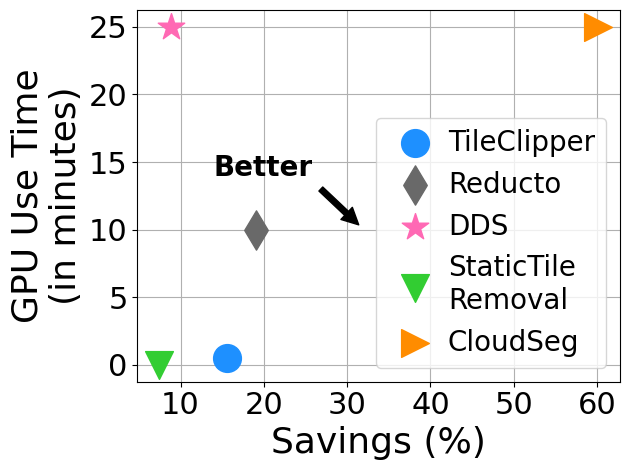

In [33]:
# Using joined_1 video of OurRec
sv_ourrec_joined1 = [tileClipper_out_dict["OurRec"]['joinedS1_s'][5], 19, 8.83, st_out_dict["OurRec"]['joinedS1_s'][5], cloudS_out_dict["OurRec"]['joinedS1_s'][5]] # reducto's daving from excel

for i in range(len(_Methods)):
    plt.scatter(sv_ourrec_joined1[i], comp_all[i], color=_colors[i], marker=_markers[i], label=_Methods[i], zorder=2, s=400)
ax = plt.gca()
ax.annotate("Better", fontweight="bold", xy=(32, 10), xytext=(14, 14), fontsize=20, arrowprops=dict(facecolor="black", shrink=0.1))

plt.xlabel("Savings (%)", fontsize=26)
plt.ylabel("GPU Use Time\n(in minutes)", fontsize=26)
plt.yticks(fontsize=22)
plt.xticks(fontsize=22)
plt.grid(True)
plt.tight_layout()
plt.legend(fontsize=20, handletextpad=0.2, loc="lower right")
# plt.savefig("../assets/Plots/GPU_vs_Saving.pdf", bbox_inches = 'tight')

**Savings Plot (Fig 11d)**

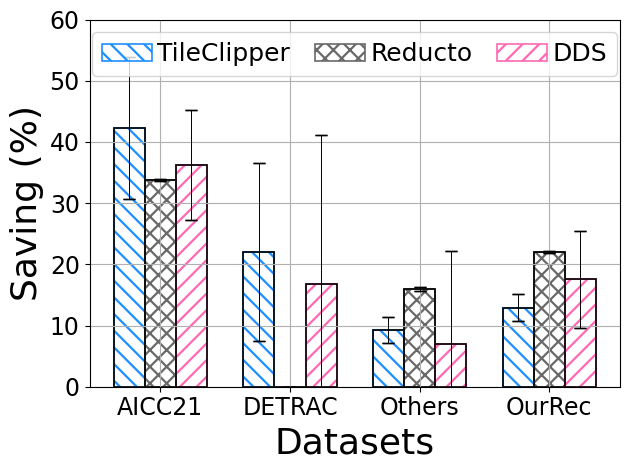

In [34]:
plt.rcParams["hatch.linewidth"] = 1.6
plt.bar(np.arange(len(DATASET))-0.24, list(_tileClipper_out[1:,5]), label="TileClipper", yerr=yerr_tileClipper[1:,5], fill=False, linewidth=1.2, edgecolor=colors[0], hatch=patterns[0], width=0.24, capsize=4, error_kw=dict(elinewidth=0.6))
plt.bar(np.arange(len(DATASET))-0.24, list(_tileClipper_out[1:,5]), yerr=yerr_tileClipper[1:,5], fill=False, linewidth=1.2, edgecolor="k", width=0.24, capsize=4, error_kw=dict(elinewidth=0.6))

plt.bar(np.arange(len(DATASET)), reducto_saving, label="Reducto", yerr=yerr_reducto_saving, fill=False, linewidth=1.2, edgecolor=colors[3], hatch=patterns[2], width=0.24, capsize=4, error_kw=dict(elinewidth=0.6))
plt.bar(np.arange(len(DATASET)), reducto_saving, yerr=yerr_reducto_saving, fill=False, linewidth=1.2, edgecolor="k", width=0.24, capsize=4, error_kw=dict(elinewidth=0.6))

plt.bar(np.arange(len(DATASET))+0.24, _dds_saving, label="DDS", yerr=yerr_dds_saving, fill=False, linewidth=1.2, edgecolor=colors[1], hatch=patterns[1], width=0.24, capsize=4, error_kw=dict(elinewidth=0.6))
plt.bar(np.arange(len(DATASET))+0.24, _dds_saving, yerr=yerr_dds_saving, fill=False, linewidth=1.2, edgecolor='k', width=0.24, capsize=4, error_kw=dict(elinewidth=0.6))

plt.ylabel("Saving (%)", fontsize=26)
plt.xlabel("Datasets", fontsize=26)
plt.yticks(fontsize=17)
plt.xticks(np.arange(len(DATASET)), DATASET, fontsize=17)
plt.grid(True)
plt.ylim(0, 60)
plt.tight_layout()
plt.legend(fontsize=18, loc='upper center', ncol=3, columnspacing=1, handletextpad=0.2)#, bbox_to_anchor=(1,0.5))#ncol=3, labelspacing=0.2, handletextpad=0.01)
# plt.savefig("../assets/Plots/Savings Plot new.pdf", bbox_inches = 'tight')

**Accuracy Plot (Fig 11a)**

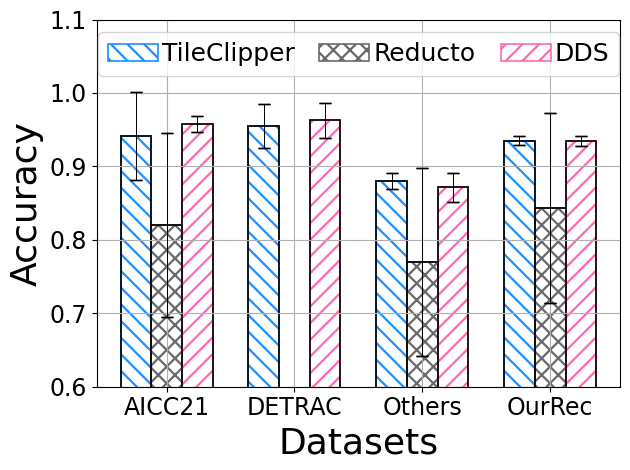

In [35]:
# Accuracy
plt.rcParams["hatch.linewidth"] = 1.6
plt.bar(np.arange(len(DATASET))-0.24, list(_tileClipper_out[1:,0]), label="TileClipper", yerr=yerr_tileClipper[1:,0], fill=False, linewidth=1.2, edgecolor=colors[0], hatch=patterns[0], width=0.24, capsize=4, error_kw=dict(elinewidth=0.6))
plt.bar(np.arange(len(DATASET))-0.24, list(_tileClipper_out[1:,0]), yerr=yerr_tileClipper[1:,0], fill=False, linewidth=1.2, edgecolor="k", width=0.24, capsize=4, error_kw=dict(elinewidth=0.6))

plt.bar(np.arange(len(DATASET)), reducto_out_metric, label="Reducto", yerr=yerr_reducto_metric, fill=False, linewidth=1.2, edgecolor=colors[3], hatch=patterns[2], width=0.24, capsize=4, error_kw=dict(elinewidth=0.6))
plt.bar(np.arange(len(DATASET)), reducto_out_metric, yerr=yerr_reducto_metric, fill=False, linewidth=1.2, edgecolor="k", width=0.24, capsize=4, error_kw=dict(elinewidth=0.6))

plt.bar(np.arange(len(DATASET))+0.24, _dds_out[1:,0], label="DDS", yerr=yerr_dds[1:,0], fill=False, linewidth=1.2, edgecolor=colors[1], hatch=patterns[1], width=0.24, capsize=4, error_kw=dict(elinewidth=0.6))
plt.bar(np.arange(len(DATASET))+0.24, _dds_out[1:,0], yerr=yerr_dds[1:,0], fill=False, linewidth=1.2, edgecolor='k', width=0.24, capsize=4, error_kw=dict(elinewidth=0.6))

plt.ylabel("Accuracy", fontsize=26)
plt.xlabel("Datasets", fontsize=26)
plt.yticks(fontsize=17)
plt.ylim(0.6,1.1)
plt.xticks(np.arange(len(DATASET)), DATASET, fontsize=17)
plt.grid(True)
plt.tight_layout()
plt.legend(fontsize=18, loc='upper center', ncol=3, columnspacing=1, handletextpad=0.16)
# plt.savefig("../assets/Plots/Accuracy.pdf", bbox_inches = 'tight')

**Precision Plot (Fig 11b)**

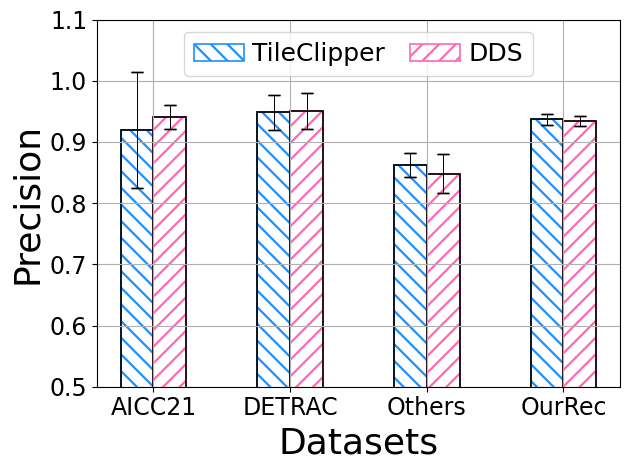

In [36]:
plt.rcParams["hatch.linewidth"] = 1.6
plt.bar(np.arange(len(DATASET))-0.12, list(_tileClipper_out[1:, 2]), label="TileClipper", yerr=yerr_tileClipper[1:, 2], fill=False, linewidth=1.2, edgecolor=colors[0], hatch=patterns[0], width=0.24, capsize=4, error_kw=dict(elinewidth=0.6))
plt.bar(np.arange(len(DATASET))-0.12, list(_tileClipper_out[1:, 2]), yerr=yerr_tileClipper[1:, 2], fill=False, linewidth=1.2, edgecolor="k", width=0.24, capsize=4, error_kw=dict(elinewidth=0.6))

plt.bar(np.arange(len(DATASET))+0.12, _dds_out[1:, 2], label="DDS", yerr=yerr_dds[1:, 2], fill=False, linewidth=1.2, edgecolor=colors[1], hatch=patterns[1], width=0.24, capsize=4, error_kw=dict(elinewidth=0.6))
plt.bar(np.arange(len(DATASET))+0.12, _dds_out[1:, 2], yerr=yerr_dds[1:, 2], fill=False, linewidth=1.2, edgecolor='k', width=0.24, capsize=4, error_kw=dict(elinewidth=0.6))

plt.ylabel("Precision", fontsize=26)
plt.xlabel("Datasets", fontsize=26)
plt.yticks(fontsize=17)
plt.ylim(0.5, 1.1)
plt.xticks(np.arange(len(DATASET)), DATASET, fontsize=17)
plt.grid(True)
plt.tight_layout()
plt.legend(fontsize=18, loc='upper center', ncol=3, columnspacing=1, handletextpad=0.34)
# plt.savefig("../assets/Plots/Precision plot.pdf", bbox_inches = 'tight')

**Recall Plot (Fig 11c)**

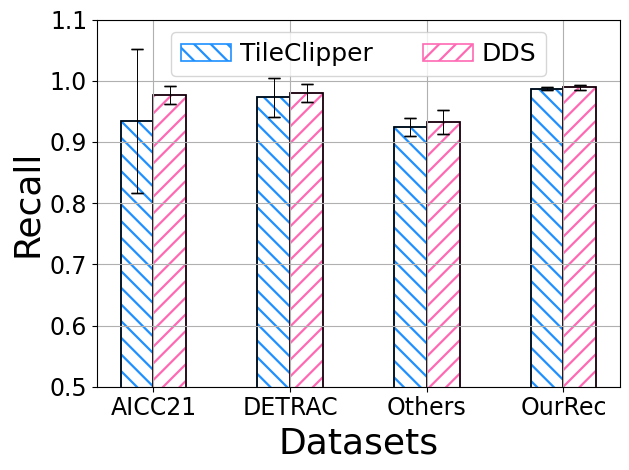

In [37]:
plt.rcParams["hatch.linewidth"] = 1.6

plt.bar(np.arange(len(DATASET))-0.12, list(_tileClipper_out[1:, 3]), label="TileClipper", yerr=yerr_tileClipper[1:, 3], fill=False, linewidth=1.2, edgecolor=colors[0], hatch=patterns[0], width=0.24, capsize=4, error_kw=dict(elinewidth=0.6))
plt.bar(np.arange(len(DATASET))-0.12, list(_tileClipper_out[1:, 3]), yerr=yerr_tileClipper[1:, 3], fill=False, linewidth=1.2, edgecolor="k", width=0.24, capsize=4, error_kw=dict(elinewidth=0.6))

plt.bar(np.arange(len(DATASET))+0.12, _dds_out[1:, 3], label="DDS", yerr=yerr_dds[1:, 3], fill=False, linewidth=1.2, edgecolor=colors[1], hatch=patterns[1], width=0.24, capsize=4, error_kw=dict(elinewidth=0.6))
plt.bar(np.arange(len(DATASET))+0.12, _dds_out[1:, 3], yerr=yerr_dds[1:, 3], fill=False, linewidth=1.2, edgecolor='k', width=0.24, capsize=4, error_kw=dict(elinewidth=0.6))

plt.ylabel("Recall", fontsize=26)
plt.xlabel("Datasets", fontsize=26)
plt.yticks(fontsize=17)
plt.ylim(0.5, 1.1)
plt.xticks(np.arange(len(DATASET)), DATASET, fontsize=17)
plt.grid(True)
plt.tight_layout()
plt.legend(fontsize=18, loc='upper center', ncol=2, handletextpad=0.34)
# plt.savefig("../assets/Plots/Recall plot.pdf", bbox_inches = 'tight')

# Different Lighting Conditions plot (Fig 13c and 13d)

In [98]:
tileClipper = np.array([(np.array(tileClipper_out_dict["AIConditions"]["cam_1rain_"])+np.array(tileClipper_out_dict["AIConditions"]["cam_4rain_"])+np.array(tileClipper_out_dict["AIConditions"]["cam_5rain_"])+np.array(tileClipper_out_dict["AIConditions"]["cam_7rain_"]))/4, (np.array(tileClipper_out_dict["AIConditions"]["cam_1_a_se"])+np.array(tileClipper_out_dict["AIConditions"]["cam_4_a_5m"])+np.array(tileClipper_out_dict["AIConditions"]["cam_5_a_5m"])+np.array(tileClipper_out_dict["AIConditions"]["cam_7_a_5m"]))/4, (np.array(tileClipper_out_dict["AIConditions"]["cam_1dawn_"])+np.array(tileClipper_out_dict["AIConditions"]["cam_4dawn_"])+np.array(tileClipper_out_dict["AIConditions"]["cam_5dawn_"])+np.array(tileClipper_out_dict["AIConditions"]["cam_7dawn_"]))/4])
yerr_tileClipper_we = np.array([np.std(np.array([np.array(tileClipper_out_dict["AIConditions"]["cam_1rain_"]), np.array(tileClipper_out_dict["AIConditions"]["cam_4rain_"]), np.array(tileClipper_out_dict["AIConditions"]["cam_5rain_"]), np.array(tileClipper_out_dict["AIConditions"]["cam_7rain_"])]), axis=0),
                np.std(np.array([np.array(tileClipper_out_dict["AIConditions"]["cam_1_a_se"]), np.array(tileClipper_out_dict["AIConditions"]["cam_4_a_5m"]), np.array(tileClipper_out_dict["AIConditions"]["cam_5_a_5m"]), np.array(tileClipper_out_dict["AIConditions"]["cam_7_a_5m"])]), axis=0),
                np.std(np.array([np.array(tileClipper_out_dict["AIConditions"]["cam_1dawn_"]), np.array(tileClipper_out_dict["AIConditions"]["cam_4dawn_"]), np.array(tileClipper_out_dict["AIConditions"]["cam_5dawn_"]), np.array(tileClipper_out_dict["AIConditions"]["cam_7dawn_"])]), axis=0)])

dds = np.array([(np.array(dds_out_dict["AIConditions"]["cam_1rain_"])+np.array(dds_out_dict["AIConditions"]["cam_4rain_"])+np.array(dds_out_dict["AIConditions"]["cam_5rain_"])+np.array(dds_out_dict["AIConditions"]["cam_7rain_"]))/4, (np.array(dds_out_dict["AIConditions"]["cam_1_a_se"])+np.array(dds_out_dict["AIConditions"]["cam_4_a_5m"])+np.array(dds_out_dict["AIConditions"]["cam_5_a_5m"])+np.array(dds_out_dict["AIConditions"]["cam_7_a_5m"]))/4, (np.array(dds_out_dict["AIConditions"]["cam_1dawn_"])+np.array(dds_out_dict["AIConditions"]["cam_4dawn_"])+np.array(dds_out_dict["AIConditions"]["cam_5dawn_"])+np.array(dds_out_dict["AIConditions"]["cam_7dawn_"]))/4])
yerr_dds_we = np.array([np.std(np.array([np.array(dds_out_dict["AIConditions"]["cam_1rain_"]), np.array(dds_out_dict["AIConditions"]["cam_4rain_"]), np.array(dds_out_dict["AIConditions"]["cam_5rain_"]), np.array(dds_out_dict["AIConditions"]["cam_7rain_"])]), axis=0),
                np.std(np.array([np.array(dds_out_dict["AIConditions"]["cam_1_a_se"]), np.array(dds_out_dict["AIConditions"]["cam_4_a_5m"]), np.array(dds_out_dict["AIConditions"]["cam_5_a_5m"]), np.array(dds_out_dict["AIConditions"]["cam_7_a_5m"])]), axis=0),
                np.std(np.array([np.array(dds_out_dict["AIConditions"]["cam_1dawn_"]), np.array(dds_out_dict["AIConditions"]["cam_4dawn_"]), np.array(dds_out_dict["AIConditions"]["cam_5dawn_"]), np.array(dds_out_dict["AIConditions"]["cam_7dawn_"])]), axis=0)])

cloudS = np.array([(np.array(cloudS_out_dict["AIConditions"]["cam_1rain_"])+np.array(cloudS_out_dict["AIConditions"]["cam_4rain_"])+np.array(cloudS_out_dict["AIConditions"]["cam_5rain_"])+np.array(cloudS_out_dict["AIConditions"]["cam_7rain_"]))/4, (np.array(cloudS_out_dict["AIConditions"]["cam_1_a_se"])+np.array(cloudS_out_dict["AIConditions"]["cam_4_a_5m"])+np.array(cloudS_out_dict["AIConditions"]["cam_5_a_5m"])+np.array(cloudS_out_dict["AIConditions"]["cam_7_a_5m"]))/4, (np.array(cloudS_out_dict["AIConditions"]["cam_1dawn_"])+np.array(cloudS_out_dict["AIConditions"]["cam_4dawn_"])+np.array(cloudS_out_dict["AIConditions"]["cam_5dawn_"])+np.array(cloudS_out_dict["AIConditions"]["cam_7dawn_"]))/4])
yerr_cloudS_we = np.array([np.std(np.array([np.array(cloudS_out_dict["AIConditions"]["cam_1rain_"]), np.array(cloudS_out_dict["AIConditions"]["cam_4rain_"]), np.array(cloudS_out_dict["AIConditions"]["cam_5rain_"]), np.array(cloudS_out_dict["AIConditions"]["cam_7rain_"])]), axis=0),
                np.std(np.array([np.array(cloudS_out_dict["AIConditions"]["cam_1_a_se"]), np.array(cloudS_out_dict["AIConditions"]["cam_4_a_5m"]), np.array(cloudS_out_dict["AIConditions"]["cam_5_a_5m"]), np.array(cloudS_out_dict["AIConditions"]["cam_7_a_5m"])]), axis=0),
                np.std(np.array([np.array(cloudS_out_dict["AIConditions"]["cam_1dawn_"]), np.array(cloudS_out_dict["AIConditions"]["cam_4dawn_"]), np.array(cloudS_out_dict["AIConditions"]["cam_5dawn_"]), np.array(cloudS_out_dict["AIConditions"]["cam_7dawn_"])]), axis=0)])

st = np.array([(np.array(st_out_dict["AIConditions"]["cam_1rain_"])+np.array(st_out_dict["AIConditions"]["cam_4rain_"])+np.array(st_out_dict["AIConditions"]["cam_5rain_"])+np.array(st_out_dict["AIConditions"]["cam_7rain_"]))/4, (np.array(st_out_dict["AIConditions"]["cam_1_a_se"])+np.array(st_out_dict["AIConditions"]["cam_4_a_5m"])+np.array(st_out_dict["AIConditions"]["cam_5_a_5m"])+np.array(st_out_dict["AIConditions"]["cam_7_a_5m"]))/4, (np.array(st_out_dict["AIConditions"]["cam_1dawn_"])+np.array(st_out_dict["AIConditions"]["cam_4dawn_"])+np.array(st_out_dict["AIConditions"]["cam_5dawn_"])+np.array(st_out_dict["AIConditions"]["cam_7dawn_"]))/4])
yerr_st_we = np.array([np.std(np.array([np.array(st_out_dict["AIConditions"]["cam_1rain_"]), np.array(st_out_dict["AIConditions"]["cam_4rain_"]), np.array(st_out_dict["AIConditions"]["cam_5rain_"]), np.array(st_out_dict["AIConditions"]["cam_7rain_"])]), axis=0),
                np.std(np.array([np.array(st_out_dict["AIConditions"]["cam_1_a_se"]), np.array(st_out_dict["AIConditions"]["cam_4_a_5m"]), np.array(st_out_dict["AIConditions"]["cam_5_a_5m"]), np.array(st_out_dict["AIConditions"]["cam_7_a_5m"])]), axis=0),
                np.std(np.array([np.array(st_out_dict["AIConditions"]["cam_1dawn_"]), np.array(st_out_dict["AIConditions"]["cam_4dawn_"]), np.array(st_out_dict["AIConditions"]["cam_5dawn_"]), np.array(st_out_dict["AIConditions"]["cam_7dawn_"])]), axis=0)])

# [Rain, Noon, Dawn]

In [99]:
# Conditions [rain, noon, dawn]
reducto_weather_metric = [0.815, 0.8225, 0.77]
yerr_reducto_we = [0.059, 0.0269, 0.053]

reducto_weather_saving = [15, 53.75, 33.5]
yerr_reducto_weather_saving = [11.7, 16.679, 16.7407]

dds_saving_weather = [28.67, 30.02, 29.72]
yerr_dds_saving_weather = [8.22, 9.35, 12.07]

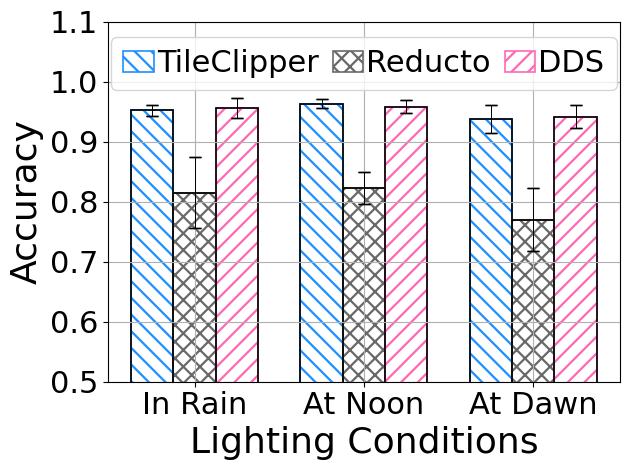

In [100]:
CONDITIONS = ["In Rain", "At Noon", "At Dawn"]
# Accuracy

plt.rcParams["hatch.linewidth"] = 1.6
plt.bar(np.arange(len(CONDITIONS))-0.25, tileClipper[:,0], label="TileClipper", yerr=yerr_tileClipper_we[:,0], fill=False, linewidth=1.2, edgecolor=colors[0], hatch=patterns[0], width=0.25, capsize=4, error_kw=dict(elinewidth=0.6))
plt.bar(np.arange(len(CONDITIONS))-0.25, tileClipper[:,0], yerr=yerr_tileClipper_we[:,0], fill=False, linewidth=1.2, edgecolor="k", width=0.25, capsize=4, error_kw=dict(elinewidth=0.6))

plt.bar(np.arange(len(CONDITIONS)), reducto_weather_metric, label="Reducto", yerr=yerr_reducto_we, fill=False, linewidth=1.2, edgecolor=colors[3], hatch=patterns[2], width=0.25, capsize=4, error_kw=dict(elinewidth=0.6))
plt.bar(np.arange(len(CONDITIONS)), reducto_weather_metric, yerr=yerr_reducto_we, fill=False, linewidth=1.2, edgecolor="k", width=0.25, capsize=4, error_kw=dict(elinewidth=0.6))

plt.bar(np.arange(len(CONDITIONS))+0.25, dds[:,0], label="DDS", yerr=yerr_dds_we[:,0], fill=False, linewidth=1.2, edgecolor=colors[1], hatch=patterns[1], width=0.25, capsize=4, error_kw=dict(elinewidth=0.6))
plt.bar(np.arange(len(CONDITIONS))+0.25, dds[:,0], yerr=yerr_dds_we[:,0], fill=False, linewidth=1.2, edgecolor='k', width=0.25, capsize=4, error_kw=dict(elinewidth=0.6))

plt.ylabel("Accuracy", fontsize=26)
plt.xlabel("Lighting Conditions", fontsize=26)
plt.yticks(fontsize=22)
plt.ylim(0.5, 1.1)
plt.xticks(np.arange(len(CONDITIONS)), CONDITIONS, fontsize=22)
plt.grid(True)
plt.tight_layout()
plt.legend(fontsize=22, loc='upper center', ncol=3, columnspacing=0.45, handletextpad=0.1, handlelength=1.)
# plt.savefig("../assets/Plots/Accuracy different weather.pdf", bbox_inches = 'tight')

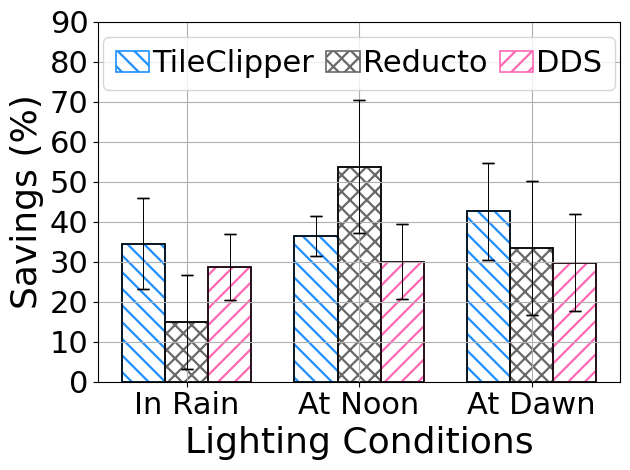

In [101]:
CONDITIONS = ["In Rain", "At Noon", "At Dawn"]
# Savings

plt.rcParams["hatch.linewidth"] = 1.6
plt.bar(np.arange(len(CONDITIONS))-0.25, tileClipper[:,5], label="TileClipper", yerr=yerr_tileClipper_we[:,5], fill=False, linewidth=1.2, edgecolor=colors[0], hatch=patterns[0], width=0.25, capsize=4, error_kw=dict(elinewidth=0.6))
plt.bar(np.arange(len(CONDITIONS))-0.25, tileClipper[:,5], yerr=yerr_tileClipper_we[:,5], fill=False, linewidth=1.2, edgecolor="k", width=0.25, capsize=4, error_kw=dict(elinewidth=0.6))

plt.bar(np.arange(len(CONDITIONS)), reducto_weather_saving, label="Reducto", yerr=yerr_reducto_weather_saving, fill=False, linewidth=1.2, edgecolor=colors[3], hatch=patterns[2], width=0.25, capsize=4, error_kw=dict(elinewidth=0.6))
plt.bar(np.arange(len(CONDITIONS)), reducto_weather_saving, yerr=yerr_reducto_weather_saving, fill=False, linewidth=1.2, edgecolor="k", width=0.25, capsize=4, error_kw=dict(elinewidth=0.6))

plt.bar(np.arange(len(CONDITIONS))+0.25, dds_saving_weather, label="DDS", yerr=yerr_dds_saving_weather, fill=False, linewidth=1.2, edgecolor=colors[1], hatch=patterns[1], width=0.25, capsize=4, error_kw=dict(elinewidth=0.6))
plt.bar(np.arange(len(CONDITIONS))+0.25, dds_saving_weather, yerr=yerr_dds_saving_weather, fill=False, linewidth=1.2, edgecolor='k', width=0.25, capsize=4, error_kw=dict(elinewidth=0.6))

plt.ylabel("Savings (%)", fontsize=26)
plt.xlabel("Lighting Conditions", fontsize=26)
plt.yticks(fontsize=22)
# plt.xticks(fontsize=22)
plt.ylim(0, 90)
plt.xticks(np.arange(len(CONDITIONS)), CONDITIONS, fontsize=22)
plt.grid(True)
plt.tight_layout()
plt.legend(fontsize=22, loc='upper center', ncol=3, columnspacing=0.4, handletextpad=0.1, handlelength=1.1)
# plt.savefig("../assets/Plots/Savings different weather.pdf", bbox_inches = 'tight')

# With and Without Recalibration (Fig 15a and 15b)

In [102]:
######################################### calibrated at noon #######################################
dataset = ["AIConditions"]
yerr_tileClipper_recalib = []
tileClipper_out_without_calib = []
tileClipper_out_without_calib_dict = {}
for d in dataset:
    tmp = []
    l = 0
    tileClipper_tmp__without_calib_dict = {}
    for video in Path("../videos/TileClipper_Without_Recalibration/When_calibrated_at_noon/"+d+"/removedTileMp4").iterdir():
        l += 1
        compare = mc.CaculateMetrics(d, video.stem, "TileClipper", weather="Noon")
        # print(f"For {d}/{video.name} >>>>>>>>>>>>>>>>>>>>>\n")
        accu, f1, prec, recall = compare.calc_metrics()
        # compare.print_difference()
        qp_saving, actual_saving, total_saving = compare.calc_savings()
        tileClipper_tmp__without_calib_dict.update({video.name: [accu, f1, prec, recall, qp_saving, actual_saving, total_saving]})
        tmp.append([accu, f1, prec, recall, qp_saving, actual_saving, total_saving])
    tileClipper_out_without_calib_dict[d] = tileClipper_tmp__without_calib_dict
    tmp = np.array(tmp)
    yerr_tileClipper_recalib.append(np.std(tmp, axis=0))
    tileClipper_out_without_calib.append(tmp.mean(axis=0))
tileClipper_out_without_calib = np.array(tileClipper_out_without_calib)

# accu, f1, prec, recall, qp_saving, actual_saving, total_saving

In [103]:
tileClipper_without_calib = np.array([(np.array(tileClipper_out_without_calib_dict["AIConditions"]["cam_1rain_"])+np.array(tileClipper_out_without_calib_dict["AIConditions"]["cam_4rain_"])+np.array(tileClipper_out_without_calib_dict["AIConditions"]["cam_5rain_"])+np.array(tileClipper_out_without_calib_dict["AIConditions"]["cam_7rain_"]))/4, (np.array(tileClipper_out_without_calib_dict["AIConditions"]["cam_1dawn_"])+np.array(tileClipper_out_without_calib_dict["AIConditions"]["cam_4dawn_"])+np.array(tileClipper_out_without_calib_dict["AIConditions"]["cam_5dawn_"])+np.array(tileClipper_out_without_calib_dict["AIConditions"]["cam_7dawn_"]))/4])
yerr_tileClipper_without_recalib = np.array([np.std(np.array([np.array(tileClipper_out_without_calib_dict["AIConditions"]["cam_1rain_"]), np.array(tileClipper_out_without_calib_dict["AIConditions"]["cam_4rain_"]), np.array(tileClipper_out_without_calib_dict["AIConditions"]["cam_5rain_"]), np.array(tileClipper_out_without_calib_dict["AIConditions"]["cam_7rain_"])]), axis=0),
                np.std(np.array([np.array(tileClipper_out_without_calib_dict["AIConditions"]["cam_1dawn_"]), np.array(tileClipper_out_without_calib_dict["AIConditions"]["cam_4dawn_"]), np.array(tileClipper_out_without_calib_dict["AIConditions"]["cam_5dawn_"]), np.array(tileClipper_out_without_calib_dict["AIConditions"]["cam_7dawn_"])]), axis=0)])

tileClipper_with_calib = np.array([(np.array(tileClipper_out_dict["AIConditions"]["cam_1rain_"])+np.array(tileClipper_out_dict["AIConditions"]["cam_4rain_"])+np.array(tileClipper_out_dict["AIConditions"]["cam_5rain_"])+np.array(tileClipper_out_dict["AIConditions"]["cam_7rain_"]))/4, (np.array(tileClipper_out_dict["AIConditions"]["cam_1dawn_"])+np.array(tileClipper_out_dict["AIConditions"]["cam_4dawn_"])+np.array(tileClipper_out_dict["AIConditions"]["cam_5dawn_"])+np.array(tileClipper_out_dict["AIConditions"]["cam_7dawn_"]))/4])
yerr_tileClipper_with_calib = np.array([np.std(np.array([np.array(tileClipper_out_dict["AIConditions"]["cam_1rain_"]), np.array(tileClipper_out_dict["AIConditions"]["cam_4rain_"]), np.array(tileClipper_out_dict["AIConditions"]["cam_5rain_"]), np.array(tileClipper_out_dict["AIConditions"]["cam_7rain_"])]), axis=0),
                np.std(np.array([np.array(tileClipper_out_dict["AIConditions"]["cam_1dawn_"]), np.array(tileClipper_out_dict["AIConditions"]["cam_4dawn_"]), np.array(tileClipper_out_dict["AIConditions"]["cam_5dawn_"]), np.array(tileClipper_out_dict["AIConditions"]["cam_7dawn_"])]), axis=0)])

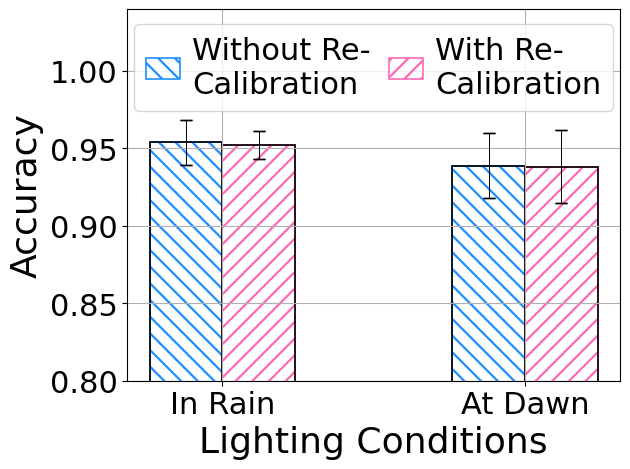

In [105]:
TWOCONDITIONS = ["In Rain", "At Dawn"]
# Accuracy

plt.rcParams["hatch.linewidth"] = 1.6
plt.bar(np.arange(len(TWOCONDITIONS))-0.12, tileClipper_without_calib[:,0], label="Without Re-\nCalibration", yerr=yerr_tileClipper_without_recalib[:,0], fill=False, linewidth=1.2, edgecolor=colors[0], hatch=patterns[0], width=0.24, capsize=4, error_kw=dict(elinewidth=0.6))
plt.bar(np.arange(len(TWOCONDITIONS))-0.12, tileClipper_without_calib[:,0], yerr=yerr_tileClipper_without_recalib[:,0], fill=False, linewidth=1.2, edgecolor="k", width=0.24, capsize=4, error_kw=dict(elinewidth=0.6))

plt.bar(np.arange(len(TWOCONDITIONS))+0.12, tileClipper_with_calib[:,0], label="With Re-\nCalibration", yerr=yerr_tileClipper_with_calib[:,0], fill=False, linewidth=1.2, edgecolor=colors[1], hatch=patterns[1], width=0.24, capsize=4, error_kw=dict(elinewidth=0.6))
plt.bar(np.arange(len(TWOCONDITIONS))+0.12, tileClipper_with_calib[:,0], yerr=yerr_tileClipper_with_calib[:,0], fill=False, linewidth=1.2, edgecolor='k', width=0.24, capsize=4, error_kw=dict(elinewidth=0.6))

plt.ylabel("Accuracy", fontsize=26)
plt.xlabel("Lighting Conditions", fontsize=26)
plt.yticks(fontsize=22)
plt.ylim(0.8, 1.04)
plt.xticks(np.arange(len(TWOCONDITIONS)), TWOCONDITIONS, fontsize=22)
plt.grid(True)
plt.tight_layout()
plt.legend(fontsize=22, loc='upper center',  ncol=2, columnspacing=0.6, handletextpad=0.4, handlelength=1.1)#, bbox_to_anchor=(0.48, 1.25))
# plt.savefig("../assets/Plots/Accuracy With vs Without recalibration.pdf", bbox_inches = 'tight')

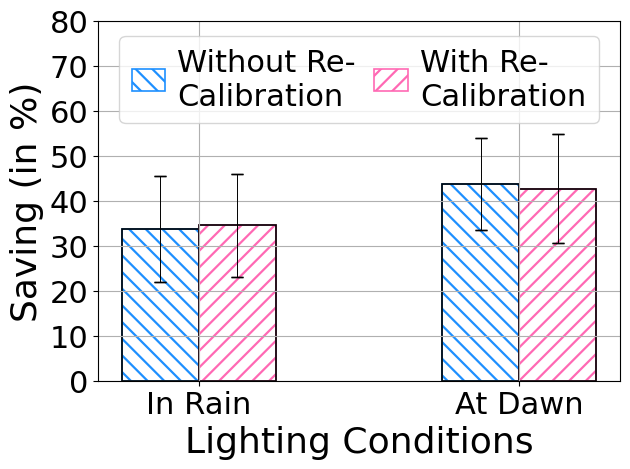

In [106]:
TWOCONDITIONS = ["In Rain", "At Dawn"]
# Saving

plt.rcParams["hatch.linewidth"] = 1.6
plt.bar(np.arange(len(TWOCONDITIONS))-0.12, tileClipper_without_calib[:, 5], label="Without Re-\nCalibration", yerr=yerr_tileClipper_without_recalib[:, 5], fill=False, linewidth=1.2, edgecolor=colors[0], hatch=patterns[0], width=0.24, capsize=4, error_kw=dict(elinewidth=0.6))
plt.bar(np.arange(len(TWOCONDITIONS))-0.12, tileClipper_without_calib[:, 5], yerr=yerr_tileClipper_without_recalib[:, 5], fill=False, linewidth=1.2, edgecolor="k", width=0.24, capsize=4, error_kw=dict(elinewidth=0.6))

plt.bar(np.arange(len(TWOCONDITIONS))+0.12, tileClipper_with_calib[:, 5], label="With Re-\nCalibration", yerr=yerr_tileClipper_with_calib[:, 5], fill=False, linewidth=1.2, edgecolor=colors[1], hatch=patterns[1], width=0.24, capsize=4, error_kw=dict(elinewidth=0.6))
plt.bar(np.arange(len(TWOCONDITIONS))+0.12, tileClipper_with_calib[:, 5], yerr=yerr_tileClipper_with_calib[:, 5], fill=False, linewidth=1.2, edgecolor='k', width=0.24, capsize=4, error_kw=dict(elinewidth=0.6))

plt.ylabel("Saving (in %)", fontsize=26)
plt.xlabel("Lighting Conditions", fontsize=26)
plt.yticks(fontsize=22)
plt.ylim(0, 80)
plt.xticks(np.arange(len(TWOCONDITIONS)), TWOCONDITIONS, fontsize=22)
plt.grid(True)
plt.tight_layout()
plt.legend(fontsize=22, loc='upper center', ncol=2, columnspacing=0.6, handletextpad=0.4, handlelength=1.1)#, bbox_to_anchor=(0.48, 1.25))
# plt.savefig("../assets/Plots/Saving With vs Without recalib.pdf", bbox_inches = 'tight')

# Different traffic density plot (Fig 13a and 13b)

In [107]:
tileClipper_low_traffic = (np.array(tileClipper_out_dict["DETRAC"]["MVI_39761"])+np.array(tileClipper_out_dict["DETRAC"]["MVI_39781"])+np.array(tileClipper_out_dict["DETRAC"]["MVI_40962"])+np.array(tileClipper_out_dict["DETRAC"]["MVI_40963"])+np.array(tileClipper_out_dict["DETRAC"]["MVI_40732"])+np.array(tileClipper_out_dict["DETRAC"]["MVI_40991"])+np.array(tileClipper_out_dict["DETRAC"]["MVI_40992"])+np.array(tileClipper_out_dict["DETRAC"]["MVI_63521"]))/8
tileClipper_high_traffic = (np.array(tileClipper_out_dict["DETRAC"]["MVI_40191"])+np.array(tileClipper_out_dict["DETRAC"]["MVI_40192"])+np.array(tileClipper_out_dict["DETRAC"]["MVI_40211"])+np.array(tileClipper_out_dict["DETRAC"]["MVI_40212"])+np.array(tileClipper_out_dict["DETRAC"]["MVI_40213"])+np.array(tileClipper_out_dict["DETRAC"]["MVI_40241"])+np.array(tileClipper_out_dict["DETRAC"]["MVI_40752"])+np.array(tileClipper_out_dict["DETRAC"]["MVI_40871"])+np.array(tileClipper_out_dict["DETRAC"]["MVI_40981"])+np.array(tileClipper_out_dict["DETRAC"]["MVI_41063"])+np.array(tileClipper_out_dict["DETRAC"]["MVI_41073"])+np.array(tileClipper_out_dict["DETRAC"]["MVI_63554"]))/12
yerr_tileClipper_traffic = np.array([np.std(np.array([np.array(tileClipper_out_dict["DETRAC"]["MVI_39761"]), 
                    np.array(tileClipper_out_dict["DETRAC"]["MVI_39781"]), np.array(tileClipper_out_dict["DETRAC"]["MVI_40962"]), 
                    np.array(tileClipper_out_dict["DETRAC"]["MVI_40963"]), np.array(tileClipper_out_dict["DETRAC"]["MVI_40732"]), 
                    np.array(tileClipper_out_dict["DETRAC"]["MVI_40991"]), np.array(tileClipper_out_dict["DETRAC"]["MVI_40992"]), 
                    np.array(tileClipper_out_dict["DETRAC"]["MVI_63521"])]), axis=0),

                    np.std(np.array([np.array(tileClipper_out_dict["DETRAC"]["MVI_40191"]), 
                    np.array(tileClipper_out_dict["DETRAC"]["MVI_40192"]), np.array(tileClipper_out_dict["DETRAC"]["MVI_40211"]), 
                    np.array(tileClipper_out_dict["DETRAC"]["MVI_40212"]), np.array(tileClipper_out_dict["DETRAC"]["MVI_40213"]), 
                    np.array(tileClipper_out_dict["DETRAC"]["MVI_40241"]), np.array(tileClipper_out_dict["DETRAC"]["MVI_40752"]), 
                    np.array(tileClipper_out_dict["DETRAC"]["MVI_40871"]), np.array(tileClipper_out_dict["DETRAC"]["MVI_40981"]), 
                    np.array(tileClipper_out_dict["DETRAC"]["MVI_41063"]), np.array(tileClipper_out_dict["DETRAC"]["MVI_41073"]), 
                    np.array(tileClipper_out_dict["DETRAC"]["MVI_63554"])]), axis=0)])

cloudS_low_traffic = (np.array(cloudS_out_dict["DETRAC"]["MVI_39761"])+np.array(cloudS_out_dict["DETRAC"]["MVI_39781"])+np.array(cloudS_out_dict["DETRAC"]["MVI_40962"])+np.array(cloudS_out_dict["DETRAC"]["MVI_40963"])+np.array(cloudS_out_dict["DETRAC"]["MVI_40732"])+np.array(cloudS_out_dict["DETRAC"]["MVI_40991"])+np.array(cloudS_out_dict["DETRAC"]["MVI_40992"])+np.array(cloudS_out_dict["DETRAC"]["MVI_63521"]))/8
cloudS_high_traffic = (np.array(cloudS_out_dict["DETRAC"]["MVI_40191"])+np.array(cloudS_out_dict["DETRAC"]["MVI_40192"])+np.array(cloudS_out_dict["DETRAC"]["MVI_40211"])+np.array(cloudS_out_dict["DETRAC"]["MVI_40212"])+np.array(cloudS_out_dict["DETRAC"]["MVI_40213"])+np.array(cloudS_out_dict["DETRAC"]["MVI_40241"])+np.array(cloudS_out_dict["DETRAC"]["MVI_40752"])+np.array(cloudS_out_dict["DETRAC"]["MVI_40871"])+np.array(cloudS_out_dict["DETRAC"]["MVI_40981"])+np.array(cloudS_out_dict["DETRAC"]["MVI_41063"])+np.array(cloudS_out_dict["DETRAC"]["MVI_41073"])+np.array(cloudS_out_dict["DETRAC"]["MVI_63554"]))/12
yerr_cloudS_traffic = np.array([np.std(np.array([np.array(cloudS_out_dict["DETRAC"]["MVI_39761"]), 
                    np.array(cloudS_out_dict["DETRAC"]["MVI_39781"]), np.array(cloudS_out_dict["DETRAC"]["MVI_40962"]), 
                    np.array(cloudS_out_dict["DETRAC"]["MVI_40963"]), np.array(cloudS_out_dict["DETRAC"]["MVI_40732"]), 
                    np.array(cloudS_out_dict["DETRAC"]["MVI_40991"]), np.array(cloudS_out_dict["DETRAC"]["MVI_40992"]), 
                    np.array(cloudS_out_dict["DETRAC"]["MVI_63521"])]), axis=0),

                    np.std(np.array([np.array(cloudS_out_dict["DETRAC"]["MVI_40191"]), 
                    np.array(cloudS_out_dict["DETRAC"]["MVI_40192"]), np.array(cloudS_out_dict["DETRAC"]["MVI_40211"]), 
                    np.array(cloudS_out_dict["DETRAC"]["MVI_40212"]), np.array(cloudS_out_dict["DETRAC"]["MVI_40213"]), 
                    np.array(cloudS_out_dict["DETRAC"]["MVI_40241"]), np.array(cloudS_out_dict["DETRAC"]["MVI_40752"]), 
                    np.array(cloudS_out_dict["DETRAC"]["MVI_40871"]), np.array(cloudS_out_dict["DETRAC"]["MVI_40981"]), 
                    np.array(cloudS_out_dict["DETRAC"]["MVI_41063"]), np.array(cloudS_out_dict["DETRAC"]["MVI_41073"]), 
                    np.array(cloudS_out_dict["DETRAC"]["MVI_63554"])]), axis=0)])

dds_low_traffic = (np.array(dds_out_dict["DETRAC"]["MVI_39761"])+np.array(dds_out_dict["DETRAC"]["MVI_39781"])+np.array(dds_out_dict["DETRAC"]["MVI_40962"])+np.array(dds_out_dict["DETRAC"]["MVI_40963"])+np.array(dds_out_dict["DETRAC"]["MVI_40732"])+np.array(dds_out_dict["DETRAC"]["MVI_40991"])+np.array(dds_out_dict["DETRAC"]["MVI_40992"])+np.array(dds_out_dict["DETRAC"]["MVI_63521"]))/8
dds_high_traffic = (np.array(dds_out_dict["DETRAC"]["MVI_40191"])+np.array(dds_out_dict["DETRAC"]["MVI_40192"])+np.array(dds_out_dict["DETRAC"]["MVI_40211"])+np.array(dds_out_dict["DETRAC"]["MVI_40212"])+np.array(dds_out_dict["DETRAC"]["MVI_40213"])+np.array(dds_out_dict["DETRAC"]["MVI_40241"])+np.array(dds_out_dict["DETRAC"]["MVI_40752"])+np.array(dds_out_dict["DETRAC"]["MVI_40871"])+np.array(dds_out_dict["DETRAC"]["MVI_40981"])+np.array(dds_out_dict["DETRAC"]["MVI_41063"])+np.array(dds_out_dict["DETRAC"]["MVI_41073"])+np.array(dds_out_dict["DETRAC"]["MVI_63554"]))/12
yerr_dds_traffic = np.array([np.std(np.array([np.array(cloudS_out_dict["DETRAC"]["MVI_39761"]), 
                    np.array(dds_out_dict["DETRAC"]["MVI_39781"]), np.array(dds_out_dict["DETRAC"]["MVI_40962"]), 
                    np.array(dds_out_dict["DETRAC"]["MVI_40963"]), np.array(dds_out_dict["DETRAC"]["MVI_40732"]), 
                    np.array(dds_out_dict["DETRAC"]["MVI_40991"]), np.array(dds_out_dict["DETRAC"]["MVI_40992"]), 
                    np.array(dds_out_dict["DETRAC"]["MVI_63521"])]), axis=0),

                    np.std(np.array([np.array(dds_out_dict["DETRAC"]["MVI_40191"]), 
                    np.array(dds_out_dict["DETRAC"]["MVI_40192"]), np.array(dds_out_dict["DETRAC"]["MVI_40211"]), 
                    np.array(dds_out_dict["DETRAC"]["MVI_40212"]), np.array(dds_out_dict["DETRAC"]["MVI_40213"]), 
                    np.array(dds_out_dict["DETRAC"]["MVI_40241"]), np.array(dds_out_dict["DETRAC"]["MVI_40752"]), 
                    np.array(dds_out_dict["DETRAC"]["MVI_40871"]), np.array(dds_out_dict["DETRAC"]["MVI_40981"]), 
                    np.array(dds_out_dict["DETRAC"]["MVI_41063"]), np.array(dds_out_dict["DETRAC"]["MVI_41073"]), 
                    np.array(dds_out_dict["DETRAC"]["MVI_63554"])]), axis=0)])

dds_traffic_saving = [12.51, 20.93]
yerr_dds_saving_traffic = [26.76, 22.96]

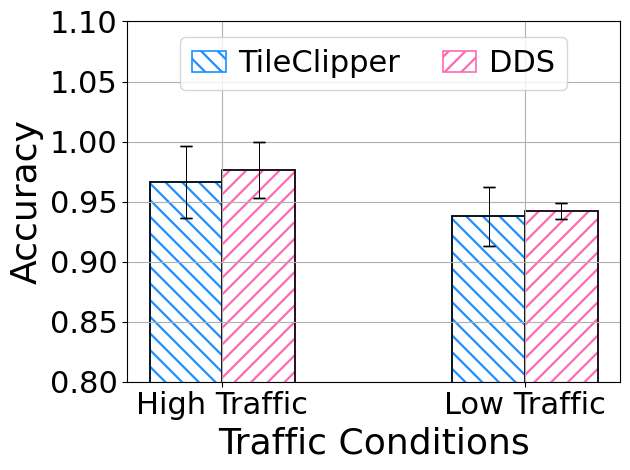

In [108]:
TWOCONDITIONS = ["High Traffic", "Low Traffic"]
# Accuracy

plt.rcParams["hatch.linewidth"] = 1.6
plt.bar(np.arange(len(TWOCONDITIONS))-0.12, [tileClipper_high_traffic[0], tileClipper_low_traffic[0]], label="TileClipper", yerr=yerr_tileClipper_traffic[:, 0], fill=False, linewidth=1.2, edgecolor=colors[0], hatch=patterns[0], width=0.24, capsize=4, error_kw=dict(elinewidth=0.6))
plt.bar(np.arange(len(TWOCONDITIONS))-0.12, [tileClipper_high_traffic[0], tileClipper_low_traffic[0]], yerr=yerr_tileClipper_traffic[:, 0], fill=False, linewidth=1.2, edgecolor="k", width=0.24, capsize=4, error_kw=dict(elinewidth=0.6))

plt.bar(np.arange(len(TWOCONDITIONS))+0.12, [dds_high_traffic[0], dds_low_traffic[0]], label="DDS", yerr=yerr_dds_traffic[:, 0], fill=False, linewidth=1.2, edgecolor=colors[1], hatch=patterns[1], width=0.24, capsize=4, error_kw=dict(elinewidth=0.6))
plt.bar(np.arange(len(TWOCONDITIONS))+0.12, [dds_high_traffic[0], dds_low_traffic[0]], yerr=yerr_dds_traffic[:, 0], fill=False, linewidth=1.2, edgecolor='k', width=0.24, capsize=4, error_kw=dict(elinewidth=0.6))

plt.ylabel("Accuracy", fontsize=26)
plt.xlabel("Traffic Conditions", fontsize=26)
plt.yticks(fontsize=22)
plt.ylim(0.8,1.1)
plt.xticks(np.arange(len(TWOCONDITIONS)), TWOCONDITIONS, fontsize=22)
plt.grid(True)
plt.tight_layout()
plt.legend(fontsize=22, loc='upper center', ncol=2, columnspacing=1.4, handletextpad=0.4, handlelength=1.1)
# plt.savefig("../assets/Plots/Accuracy traffic.pdf", bbox_inches = 'tight')

In [109]:
dds_saving_traffic = [12.51, 20.94]
yerr_dds_saving_traffic = [26.76, 22.96]

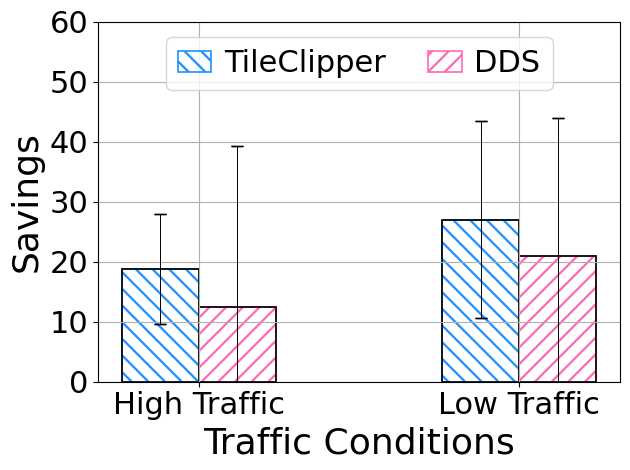

In [110]:
TWOCONDITIONS = ["High Traffic", "Low Traffic"]
# Saving

plt.rcParams["hatch.linewidth"] = 1.6
plt.bar(np.arange(len(TWOCONDITIONS))-0.12, [tileClipper_high_traffic[5], tileClipper_low_traffic[5]], label="TileClipper", yerr=yerr_tileClipper_traffic[:, 5], fill=False, linewidth=1.2, edgecolor=colors[0], hatch=patterns[0], width=0.24, capsize=4, error_kw=dict(elinewidth=0.6))
plt.bar(np.arange(len(TWOCONDITIONS))-0.12, [tileClipper_high_traffic[5], tileClipper_low_traffic[5]], yerr=yerr_tileClipper_traffic[:, 5], fill=False, linewidth=1.2, edgecolor="k", width=0.24, capsize=4, error_kw=dict(elinewidth=0.6))

plt.bar(np.arange(len(TWOCONDITIONS))+0.12, dds_saving_traffic, label="DDS", yerr=yerr_dds_saving_traffic, fill=False, linewidth=1.2, edgecolor=colors[1], hatch=patterns[1], width=0.24, capsize=4, error_kw=dict(elinewidth=0.6))
plt.bar(np.arange(len(TWOCONDITIONS))+0.12, dds_saving_traffic, yerr=yerr_dds_saving_traffic, fill=False, linewidth=1.2, edgecolor='k', width=0.24, capsize=4, error_kw=dict(elinewidth=0.6))

plt.ylabel("Savings", fontsize=26)
plt.xlabel("Traffic Conditions", fontsize=26)
plt.yticks(fontsize=22)
plt.ylim(0, 60)
plt.xticks(np.arange(len(TWOCONDITIONS)), TWOCONDITIONS, fontsize=22)
plt.grid(True)
plt.tight_layout()
plt.legend(fontsize=22, loc='upper center', ncol=2, columnspacing=1.4, handletextpad=0.4, handlelength=1.1)
# plt.savefig("../assets/Plots/Savings traffic.pdf", bbox_inches = 'tight')

# Calibration Saving plots (Fig 14c)

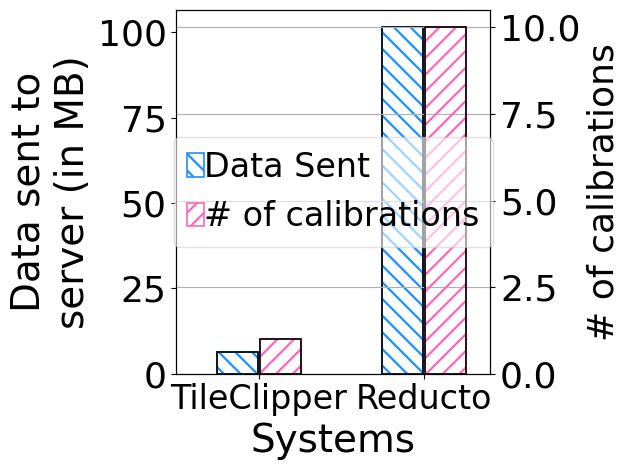

In [17]:
data_sent = [6.5, 101.5] # in MB
total_calibration_time = [0.5, 2] # in minutes

mpl.rcParams['hatch.linewidth'] = 1.6
ax1 = plt.gca()
ax2 = ax1.twinx()

b1 =ax1.bar(np.arange(2)-0.13, data_sent, fill=False, linewidth=1.2, edgecolor="dodgerblue", hatch="\\\\", width=0.25, zorder=1)
ax1.bar(np.arange(2)-0.13, data_sent, fill=False, linewidth=1.2, edgecolor="k", width=0.25, zorder=2)

b2 = ax2.bar(np.arange(2)+0.13, [1, 10], fill=False, linewidth=1.2, edgecolor="hotpink", hatch="//", width=0.25, zorder=3)
ax2.bar(np.arange(2)+0.13, [1, 10], fill=False, linewidth=1.2, edgecolor="k", width=0.25, zorder=4)

ax1.set_ylabel("Data sent to\nserver (in MB)", fontsize=28)
ax2.set_ylabel("# of calibrations", fontsize=26)
ax2.tick_params(labelsize=26)
ax1.tick_params(labelsize=26, axis="y")
ax1.tick_params(labelsize=24, axis="x")
ax1.set_xlabel("Systems", fontsize=28)

plt.xlim(-0.5, 1.4)
plt.xticks(np.arange(2), ['TileClipper', "Reducto"], fontsize=26)
plt.grid(True, zorder=0)
plt.tight_layout()
plt.legend([b1, b2], ["Data Sent", "# of calibrations"], fontsize=24, loc='center', ncol=1, handlelength=0.5, handletextpad=0.02, framealpha=0.6)#, bbox_to_anchor=(0.5, 1.16))
# plt.savefig("../assets/Plots/dataSentAndCalibration.pdf", bbox_inches = 'tight')

# Server side computation plot (Fig 14b)

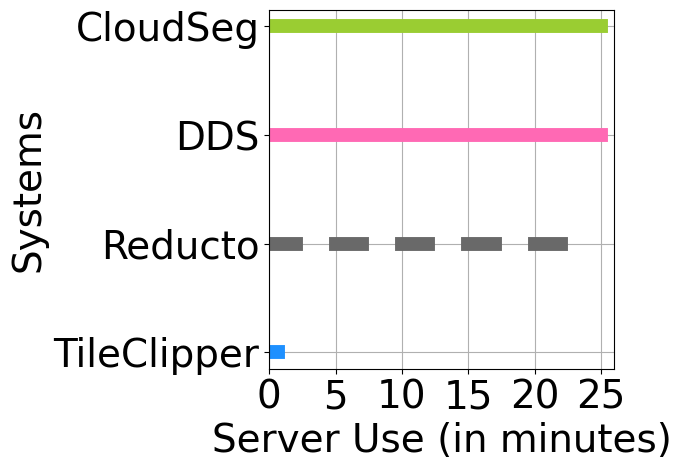

In [16]:
systems = ["TileClipper", "Reducto", "DDS", "CloudSeg"]

plt.plot([0, 0.67], [1, 1] , color='dodgerblue', label="TileClipper", linewidth=10)
plt.plot([0, 2], [2, 2] , color="dimgrey", label="Reducto", linewidth=10)
plt.plot([0, 25], [3, 3] , color='hotpink', label="DDS", linewidth=10)
plt.plot([0, 25], [4, 4] , color='yellowgreen', label="CloudSeg", linewidth=10)
plt.plot([5, 7], [2, 2] , color='dimgrey', linewidth=10)
plt.plot([10, 12], [2, 2] , color='dimgrey', linewidth=10)
plt.plot([15, 17], [2, 2] , color='dimgrey', linewidth=10)
plt.plot([20, 22], [2, 2] , color='dimgrey', linewidth=10)
plt.xlabel("Server Use (in minutes)", fontsize=28)
plt.ylabel("Systems", fontsize=28)
plt.yticks([1,2,3,4], systems, fontsize=28)
plt.xlim(0, 26)
plt.xticks(np.arange(0, 30, 5), fontsize=28)
plt.grid(True)
plt.tight_layout()
# plt.savefig("../assets/Plots/Server runtime.pdf", bbox_inches = 'tight')

# Motivation Plot (Fig 5c)

In [13]:
actual = np.array([6.7, 8.6, 21, 18, 17, 16, 16, 19, 16, 20, 9.3, 14, 15, 24, 14, 17, 8.3, 11, 15, 13]) # in MBs
compressed = np.array([1.2, 2.0, 5.1, 4.4, 2.5, 2.5, 2.6, 5.2, 2.7, 4.3, 2.2, 1.9, 2.1, 2.6, 1.5, 1.9, 2.0, 2.4, 3.5, 2.6]) # in MB

In [14]:
a_18 = actual[np.where(actual>18)[0]]
c_18 = compressed[np.where(actual>18)[0]]

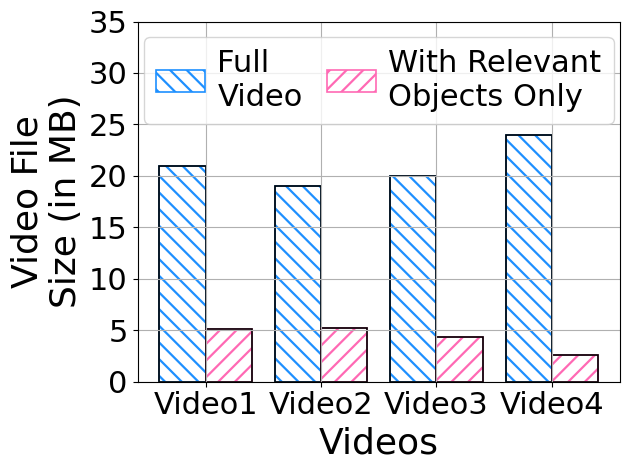

In [15]:
mpl.rcParams['hatch.linewidth'] = 1.6
b1 = plt.bar(np.arange(len(a_18))-0.2, a_18, fill=False, linewidth=1.2, edgecolor='dodgerblue', hatch="\\\\", width=0.4)
plt.bar(np.arange(len(a_18))-0.2, a_18, fill=False, linewidth=1.2, edgecolor='k', width=0.4)
b2 = plt.bar(np.arange(len(c_18))+0.2, c_18, fill=False, linewidth=1.2, edgecolor='hotpink', hatch="//", width=0.4)
plt.bar(np.arange(len(c_18))+0.2, c_18, fill=False, linewidth=1.2, edgecolor='k', width=0.4)

plt.xticks(np.arange(len(c_18)), ["Video1", "Video2", "Video3", "Video4"], fontsize=22)
plt.yticks(fontsize=22)
plt.xlabel("Videos", fontsize=26)
plt.ylabel("Video File\nSize (in MB)", fontsize=26)
plt.ylim(0, 35)
plt.grid(zorder=0)
plt.tight_layout()
plt.legend([b1, b2], ["Full\nVideo", "With Relevant\nObjects Only"], ncol=2, loc="upper center", fontsize=22, columnspacing=0.8, handletextpad=0.4, handlelength=1.6)
# plt.savefig("../assets/Plots/Motivation Plots.pdf", bbox_inches = 'tight')

# FP vs FN for gamma plot (Fig 9)

In [12]:
from __future__ import annotations
from calibrate import EvictingQueue as SingleEndedQueue

gt_root = "../assets/GroundTruths_TileLevel/"
br_root = "../assets/Bitrates/"
best_per_dir = "../assets/F2s/"

def calculate_metrics(selected: np.ndarray, ground_truth: np.ndarray, block_size: int = 0, num_calibration_seg: int = 60) -> tuple[float, float]:
    # tp = np.sum(np.logical_and(selected, ground_truth[block_size:]))
    fp = np.sum(np.logical_and(selected, np.logical_not(ground_truth[block_size:])))
    # tn = np.sum(np.logical_and(np.logical_not(selected), np.logical_not(ground_truth[block_size:])))
    fn = np.sum(np.logical_and(np.logical_not(selected), ground_truth[block_size:]))
    
    fp_r = fp/len(ground_truth)
    fn_r = fn/len(ground_truth)
    return fp_r, fn_r

def calculate_thresholds_with_gaussian_for_no_object_cases(true_cluster: SingleEndedQueue, false_cluster: SingleEndedQueue, bitrates: np.ndarray, ground_truth_segs_during_calibration: np.ndarray, lower_percentile: int = 10, upper_percentile: int = 80, alpha: float = 0.5, beta: float = 0.5, gamma: float = 1.05, obj_ratio_limit:float = 0.1, theta: float = 1.5) -> tuple[np.ndarray, np.ndarray, list, list]:
    selected = np.zeros(len(bitrates), dtype=bool)
    thresholds = np.zeros(len(bitrates))
    for i in range(len(bitrates)):
        if false_cluster == None:
            currentThreshold = np.median(list(true_cluster)) + (theta * np.std(list(true_cluster)))
            true_cluster.append(float(bitrates[i]))
        else:
            print("false_cluster != None")
            currentThreshold = ((alpha * np.percentile(list(true_cluster), lower_percentile)) + (beta * np.percentile(list(false_cluster), upper_percentile)))
        
        if bitrates[i] > currentThreshold:
            selected[i] = True
            if false_cluster != None:
                true_cluster.append(float(bitrates[i]))
        else:
            if false_cluster != None:
                false_cluster.append(float(bitrates[i]))
        thresholds[i] = currentThreshold
    return selected, thresholds


def align_length(selected_window_bitrates: np.ndarray, ground_truth: np.ndarray) -> tuple[np.ndarray, np.ndarray]:
    if len(selected_window_bitrates) > len(ground_truth):
        selected_window_bitrates = selected_window_bitrates[:len(ground_truth)]
    elif len(selected_window_bitrates) < len(ground_truth):
        ground_truth = ground_truth[:len(selected_window_bitrates)]
    return selected_window_bitrates, ground_truth

def get_threshold_using_bitrates_directly_gaussian_method(first_n_true_cluster_indxs: np.ndarray, first_n_false_cluster_indxs: np.ndarray, ground_truth: np.ndarray, bitrates: np.ndarray, num_segments_for_calibration: int, lower_percentile: int = 10, upper_percentile: int = 80, cluster_size: int = 10, alpha: float = 0.5, beta: float = 0.5, obj_limit: int = 0.1, theta : float = 1.5) -> tuple[np.ndarray, np.ndarray]:
    bitrates, ground_truth = align_length(bitrates, ground_truth)
    obj_ratio_during_calibration = len(first_n_true_cluster_indxs)/len(ground_truth[:num_segments_for_calibration])

    if obj_ratio_during_calibration < obj_limit:
        true_cluster = SingleEndedQueue(list(bitrates[:num_segments_for_calibration]), size = num_segments_for_calibration)
        false_cluster = None
    else:
        true_cluster = SingleEndedQueue(list(bitrates[first_n_true_cluster_indxs]), size = cluster_size)
        if len(first_n_false_cluster_indxs) != 0:
            false_cluster = SingleEndedQueue(list(bitrates[first_n_false_cluster_indxs]), size = cluster_size)
        else:
            false_cluster = SingleEndedQueue([min(bitrates[first_n_true_cluster_indxs])], size = cluster_size)

    selected, thresholds = calculate_thresholds_with_gaussian_for_no_object_cases(true_cluster, false_cluster, bitrates[num_segments_for_calibration:], ground_truth[:num_segments_for_calibration], lower_percentile, upper_percentile, alpha=alpha, beta=beta, obj_ratio_limit=obj_limit, theta=theta)
    fp_r, fn_r = calculate_metrics(selected, ground_truth[num_segments_for_calibration:])
    return fp_r, fn_r

def readGroundTruthFile(groundtruth_file_from_yolov5: str, total_tile: int) -> np.ndarray:
    """
    Reads the ground-truth text file from Yolov5
    """
    with open(groundtruth_file_from_yolov5, 'r') as file:
        content = file.readlines()
        gtValues = []
        for line in content:
            gtValues.append([int(i) for i in line.split(' ')[0:-1]])

    groundTruth = np.zeros((len(gtValues), total_tile), dtype=bool)
    for i in range(len(gtValues)):
        for j in gtValues[i]:
            groundTruth[i][j-2] = 1

    return groundTruth

def get_first_n_segments(ground_truth: np.ndarray) -> tuple[np.ndarray, np.ndarray]:
    # print(ground_truth)
    first_n_true_segments_indx = np.where(ground_truth == True)[0]
    first_n_false_segments_indx = np.where(ground_truth == False)[0]
    return first_n_true_segments_indx, first_n_false_segments_indx

def read_best_percentile_file(file_name: str) -> np.ndarray:
    # Reading the best percentile for a tile of a video. But it requires generating the pickle file first.
    return np.array(jb.load(file_name))

def get_best_percentile_for_a_tile(video_array: np.ndarray, tile_num: int) -> list:
    tmp = np.where(video_array[:, 2] == tile_num)[0]
    return video_array[tmp][np.argmax(video_array[tmp, 3])][:2]

def main(br_root_dir: str, gt_root_dir: str, best_per_dir: str, num_segments_for_calibration: int = 60, obj_ratio: float = 0.1) -> None:
    tiles = 16
    numCalSeg = num_segments_for_calibration
    rates = []
    for video in Path(br_root_dir).iterdir():
        print(str(video.stem))
        bitrates = jb.load(br_root_dir + video.stem + '.pkl').astype(float)
        gt = readGroundTruthFile(gt_root_dir + video.stem + ".txt", tiles)
        ratios = []
        # gts.append(gt)
        for tile in range(tiles):
            calSegObjRatio = (np.sum(gt[:numCalSeg, tile]) / numCalSeg)
            totalSegObjRatio = (np.sum(gt[numCalSeg:, tile]) / (len(gt) - numCalSeg))
            ratios.append([calSegObjRatio, totalSegObjRatio])
        
        # print(ratios)
        best_percentile_array = read_best_percentile_file(best_per_dir + "f2s_" + video.stem + "_cluster10.pkl")
        indxs = np.where(np.array(ratios)[:, 0] < 0.1)[0]
        
        sigmas = [0.5, 1.0, 1.5, 2.0, 2.5]
        print("Tiles < 0.1", len(indxs), "\n")
        for sigma in sigmas:
            for indx in indxs: # iterating on tiles having obj_ratio < 0.1
                # gt[indx]
                first_n_true_segments_indx, first_n_false_segments_indx = get_first_n_segments(gt[:num_segments_for_calibration, indx])
                l, u = get_best_percentile_for_a_tile(best_percentile_array, indx)
                fp_r, fn_r = get_threshold_using_bitrates_directly_gaussian_method(first_n_true_segments_indx, first_n_false_segments_indx, 
                                                                                gt[:, indx], bitrates[:, indx], 
                                                                                num_segments_for_calibration, 
                                                                                lower_percentile=l, upper_percentile=u, theta=sigma)
                rates.append([sigma, fp_r, fn_r])
    return rates


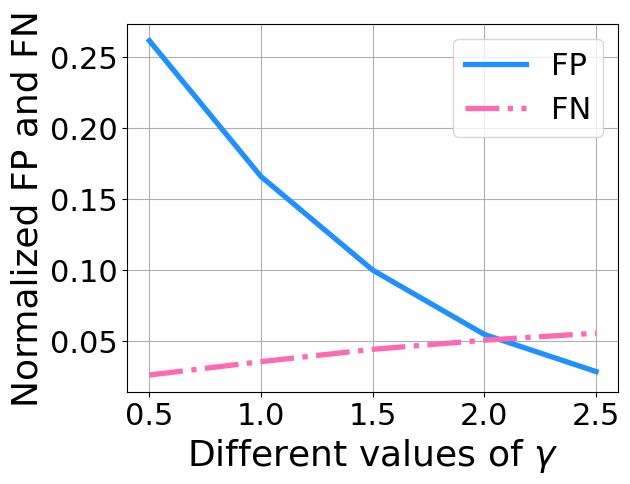

In [9]:
########## Getting optimal sigma #####################################
# Note the above cell is already run to save the output in rates.pkl file.
# However the same can be re-run by un-commenting the two lines below
# rates = main(br_root, gt_root, best_per_dir)
# jb.dump(rates, "rates.pkl")
rates = np.array(jb.load("../assets/rates.pkl"))
# print(rates)

# Calcutates obj_ratio of all videos. Requires ratio.pkl which has obj_ratio calculates for all video and stored and numpy array
# The first column of the array represents calSegObjRatio (during calibration), and second column the totalSegObjRatio (after calibration)

sigmas = [0.5, 1.0, 1.5, 2.0, 2.5]
fp_rs, fn_rs = [], []
for s in sigmas:
    fp_rs.append(np.mean(rates[np.where(rates[:, 0] == s)[0], 1]))
    fn_rs.append(np.mean(rates[np.where(rates[:, 0] == s)[0], 2]))

plt.plot(sigmas, fp_rs, label="FP", linestyle="-", linewidth=3.8, color="dodgerblue")
plt.plot(sigmas, fn_rs, label="FN", color="hotpink", linestyle="-.", linewidth=3.8)
plt.xlabel("Different values of $\\gamma$", fontsize=26)
plt.ylabel("Normalized FP and FN", fontsize=26)
plt.grid()
plt.xticks(sigmas, fontsize=22)
plt.yticks(fontsize=22)
plt.tight_layout()
plt.legend(fontsize=22)
# plt.savefig("../assets/Plots/Gamma_plot.pdf", bbox_inches="tight")

# QP Plot (Fig 10)

In [112]:
QP = [22, 24, 26, 28, 30, 32, 34, 36 , 38, 40]

# For each label.txt finding the number of detected objects

# For MVI_40192
num_videos = 21 # number of videos
num_objs = np.zeros((num_videos, len(QP)))
for indx, qp in enumerate(QP):
    with open(f"../videos/QP_Plot/labels/MVI_40192/myLabel_{str(qp)}.txt", "r") as f:
        d = f.read()
    d = d.split("\n\n")
    for v_indx, v in enumerate(d):
        vv = v.split("\n")
        dd = []
        for i in vv:
            dd += i.split(" ")[:-1]
        num_objs[v_indx, indx] = len(dd)

num_objs_diff = num_objs

# For AITr1cam10
_num_videos = 21 # number of videos
_num_objs = np.zeros((_num_videos, len(QP)))
for _indx, _qp in enumerate(QP):
    with open(f"../videos/QP_Plot/labels/AITr1cam10/myLabel_{str(_qp)}.txt", "r") as _f:
        _d = _f.read()
    _d = _d.split("\n\n")
    for _v_indx, _v in enumerate(_d):
        _vv = _v.split("\n")
        _dd = []
        for _i in _vv:
            _dd += _i.split(" ")[:-1]
        _num_objs[_v_indx, _indx] = len(_dd)

_num_objs_diff = _num_objs

In [113]:
# Filesize of the mp4 files

# For MVI_40192
num_videos = 21 # number of videos
filesizes = np.zeros((num_videos, len(QP)))
for indx, qp in enumerate(QP):
    p = sorted(list(Path(f"../videos/QP_Plot/Untiled_mp4s/MVI_40192/Untiled_mp4_{str(qp)}qp/MVI_40192_").iterdir()))
    for v_indx, v in enumerate(p):
        filesizes[v_indx, indx] = Path(v).stat().st_size/1000
        
# For AITr1cam10
_num_videos = 21 # number of videos
_filesizes = np.zeros((_num_videos, len(QP)))
for _indx, _qp in enumerate(QP):
    _p = sorted(list(Path(f"../videos/QP_Plot/Untiled_mp4s/AITr1cam10/Untiled_mp4_{str(_qp)}qp/AITr1cam10").iterdir()))
    for _v_indx, _v in enumerate(_p):
        _filesizes[_v_indx, _indx] = Path(_v).stat().st_size/1000

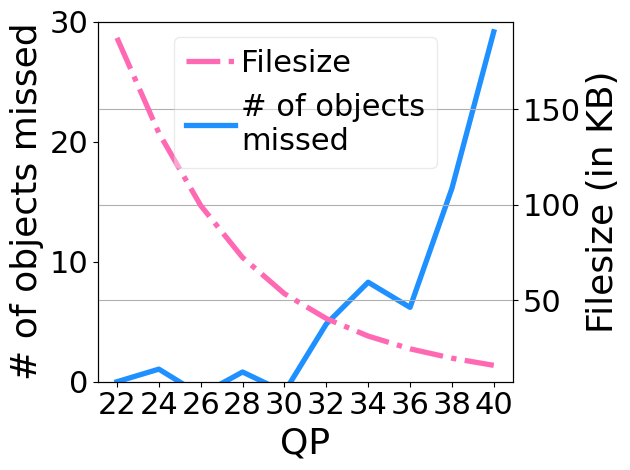

In [114]:
import matplotlib.lines as mlines

# fig, ax1 = plt.subplots()
ax1 = plt.gca()
ax2 = ax1.twinx()
l1 = ax1.plot(np.arange(len(QP)), np.mean(np.expand_dims(num_objs[:,0], 1) - num_objs, axis=0), linewidth=3.8, linestyle="-", color="dodgerblue", label="# of objects missed")
l2 = ax2.plot(np.arange(len(QP)), np.mean(filesizes, axis=0), color="hotpink", linewidth=3.8, linestyle="-.", label="Filesize")
ax1.set_ylabel("# of objects missed", fontsize=26)
ax2.set_ylabel("Filesize (in KB)", fontsize=26)
ax1.set_xlabel("QP", fontsize=26)
ax1.set_ylim(0, 30)
ax2.tick_params(labelsize=22)
ax1.tick_params(labelsize=22)
# ax2.tick_params(axis='y', colors="hotpink")#, fontsize=20)
# ax1.tick_params(axis='y', colors="dodgerblue")#, fontsize=20)
plt.xticks(np.arange(len(QP)), QP, fontsize=22)
plt.grid()
plt.tight_layout()
# l = {}
blue_line = mlines.Line2D([], [], color='dodgerblue', linestyle='-', linewidth=3.8, label='# of objects\nmissed')
pink_line = mlines.Line2D([], [], color='hotpink', linestyle='-.', linewidth=3.8, label='Filesize')
plt.legend(handles=[pink_line, blue_line], fontsize=22, loc="upper center", framealpha=0.4, ncol=1, handletextpad=0.2, handlelength=1.6)#, bbox_to_anchor=(0.5, 1.22))
# plt.savefig("../assets/Plots/QP_plot.pdf", bbox_inches="tight")

# Tile removal vs filesize (Fig 3)

In [125]:
# Removing tiles one by one and adding the filesize in file.txt
_p = Path("../videos/TileRemoval/20011_removedtile")
if _p.exists():
    sp.run("rm -rf ../videos/TileRemoval/20011_removedtile".split(" "))
sp.run("cp -r ../videos/TileRemoval/MVI_20011 ../videos/TileRemoval/20011_removedtile".split(" "))

p = list(Path("../videos/TileRemoval/20011_removedtile").iterdir())
Path("file_correct.txt").unlink()
for j in range(3, 17):
    for i in p:
        with open("file_correct.txt", 'a') as f:
            f.write(str(i.name)+" tile"+str(j)+" : "+str(Path(i).stat().st_size)+'\n')
        sp.run(["MP4Box", "-rem", str(j), str(i)])
    with open("file_correct.txt", 'a') as f:
            f.write('\n')
            f.write('\n')

Removing track ID 3
Saving ../videos/TileRemoval/20011_removedtile/output0003_tiled.mp4: 0.500 secs Interleaving
Removing track ID 3                                     
Saving ../videos/TileRemoval/20011_removedtile/output0022_tiled.mp4: 0.500 secs Interleaving
Removing track ID 3                                     
Saving ../videos/TileRemoval/20011_removedtile/output0032_tiled.mp4: 0.500 secs Interleaving
Removing track ID 3                                     
Saving ../videos/TileRemoval/20011_removedtile/output0041_tiled.mp4: 0.500 secs Interleaving
Removing track ID 3                                     
Saving ../videos/TileRemoval/20011_removedtile/output0036_tiled.mp4: 0.500 secs Interleaving
Removing track ID 3                                     
Saving ../videos/TileRemoval/20011_removedtile/output0006_tiled.mp4: 0.500 secs Interleaving
Removing track ID 3                                     
Saving ../videos/TileRemoval/20011_removedtile/output0037_tiled.mp4: 0.500 secs 

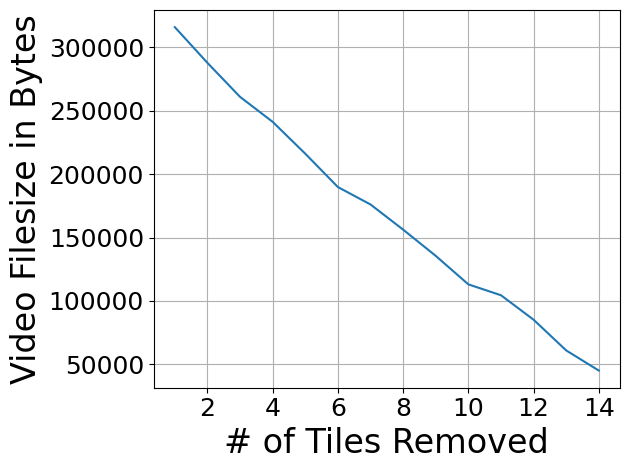

In [126]:
# Tiles removed vs file size 
with open("file_correct.txt", 'r') as f:
    d = f.read().split('\n\n')

# Each array name means that corresponding tile has been removed including the earlier removed tile.
# It means if array name is d5 the d3 is already removed and now d5 is getting removed. So, two tiles are removed.
# # dd = [int(i[i.find(':')+2:]) for i in d if i != ''] 
d3 = [int(i[i.find(':')+2:]) for i in d[0].split('\n') if i != '']
d4 = [int(i[i.find(':')+2:]) for i in d[1].split('\n') if i != '']
d5 = [int(i[i.find(':')+2:]) for i in d[2].split('\n') if i != '']
d6 = [int(i[i.find(':')+2:]) for i in d[3].split('\n') if i != '']
d7 = [int(i[i.find(':')+2:]) for i in d[4].split('\n') if i != '']
d8 = [int(i[i.find(':')+2:]) for i in d[5].split('\n') if i != '']
d9 = [int(i[i.find(':')+2:]) for i in d[6].split('\n') if i != '']
d10 = [int(i[i.find(':')+2:]) for i in d[7].split('\n') if i != '']
d11 = [int(i[i.find(':')+2:]) for i in d[8].split('\n') if i != '']
d12 = [int(i[i.find(':')+2:]) for i in d[9].split('\n') if i != '']
d13 = [int(i[i.find(':')+2:]) for i in d[10].split('\n') if i != '']
d14 = [int(i[i.find(':')+2:]) for i in d[11].split('\n') if i != '']
d15 = [int(i[i.find(':')+2:]) for i in d[12].split('\n') if i != '']
d16 = [int(i[i.find(':')+2:]) for i in d[13].split('\n') if i != '']

arr = [np.mean(d3), np.mean(d4), np.mean(d5), np.mean(d6), np.mean(d7), np.mean(d8), np.mean(d9), np.mean(d10), np.mean(d11), np.mean(d12), np.mean(d13), np.mean(d14), np.mean(d15), np.mean(d16)]

plt.plot([i for i in range(1, 15)], arr )
plt.xlabel("# of Tiles Removed", fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel("Video Filesize in Bytes", fontsize=24)
plt.grid(True)
plt.tight_layout()
# plt.savefig("../assets/Plots/tiles_removal_vs_filesize.pdf", bbox_inches = 'tight')

# Segment Correlation Plot (Fig 4)

In [3]:
# Number of objects in the segs
tree = et.parse("../videos/DETRAC/annotations/MVI_41073_v3.xml")
root = tree.getroot()
# wantedClasses = ['1', '2', '3', '5', '7']
objects = np.zeros(len(root.findall('frame'))) # total number of frames
for i, c in enumerate(root.findall('frame')):
    targets = c.find('target_list').findall('target')
    objects[i] = len(targets)
a = root.findall("frame")    
numSeg = int(len(objects)/15) # each seg has 15 frames
sumOfObjects = np.zeros(numSeg)
j = 0
for i in range(numSeg): # each seg has 15 frames
    sumOfObjects[i] = np.sum(objects[j:j+15])
    j += 15

# Filesizes 
p = Path("../videos/DETRAC/tiled_4x4_mp4/MVI_41073")   
size = []
for i in sorted(p.iterdir()):
    size.append(i.stat().st_size/1024)
    # print(i.name)

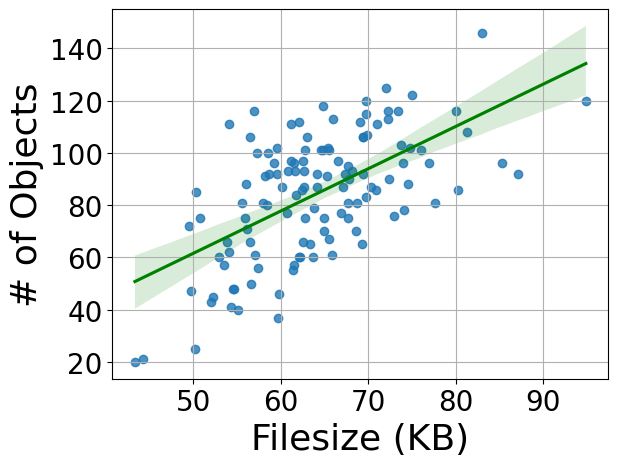

In [5]:
if objects.shape[0]%15 != 0:
    size1 = size[:-1]
else:
    size1 = size 
# plt.scatter(size1, sumOfObjects)
ax = sns.regplot(x=size1, y=sumOfObjects, line_kws={"color":"g"})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Filesize (KB)", fontsize=26)
plt.ylabel("# of Objects", fontsize=26)
plt.grid(True)
# plt.savefig("../assets/Plots/MVI_41073_correlation_plot_with_line.png")

In [6]:
# Number of objects in the segs
tree = et.parse("../videos/DETRAC/annotations/MVI_63521_v3.xml")
root = tree.getroot()
# wantedClasses = ['1', '2', '3', '5', '7']
objects = np.zeros(len(root.findall('frame'))) # total number of frames
for i, c in enumerate(root.findall('frame')):
    targets = c.find('target_list').findall('target')
    objects[i] = len(targets)
a = root.findall("frame")    
numSeg = int(len(objects)/15) # each seg has 15 frames
sumOfObjects = np.zeros(numSeg)
j = 0
for i in range(numSeg): # each seg has 15 frames
    sumOfObjects[i] = np.sum(objects[j:j+15])
    j += 15

# Filesizes 
p = Path("../videos/DETRAC/tiled_4x4_mp4/MVI_63521")   
size = []
for i in sorted(p.iterdir()):
    size.append(i.stat().st_size/1024)
    # print(i.name)

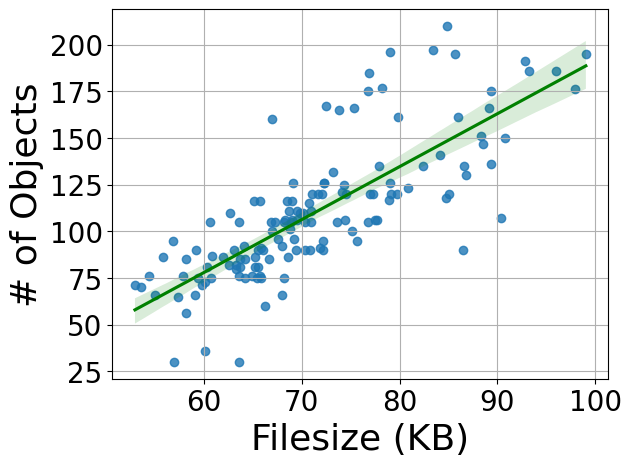

In [7]:
if objects.shape[0]%15 != 0:
    size1 = size[:-1]
else:
    size1 = size 
# plt.scatter(size1, sumOfObjects)
ax = sns.regplot(x=size1, y=sumOfObjects, line_kws={"color":"g"})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Filesize (KB)", fontsize=26)
plt.ylabel("# of Objects", fontsize=26)
plt.grid(True)
# plt.savefig("../assets/Plots/MVI_63521_correlation_plot_with_line.png")

# With and Without Fallback (Fig 17a)

In [168]:
# With and Without Fallback

_path = "../"
datasets = ["without_fallback"]

ablation_tileClipper_out = []
ablation_yerr_tileClipper = []
ablation_tileClipper_out_dict = {}
for dd in datasets:
    ablation_tmp = []
    ablation_l = 0
    ablation_tileClipper_tmp_dict = {}
    for video in Path(_path+"videos/"+dd+"/tiled_4x4_mp4").iterdir():
        ablation_l += 1
        ablation_compare = mc.CaculateMetrics(datasetName=dd, filename=video.stem, method=dd)
        # print(f"For {dd}/{video.name} >>>>>>>>>>>>>>>>>>>>>\n")
        accu, f1, prec, recall = ablation_compare.calc_metrics()
        # compare.print_difference()
        qp_saving, actual_saving, total_saving = ablation_compare.calc_savings()
        ablation_tileClipper_tmp_dict.update({video.name: [accu, f1, prec, recall, qp_saving, actual_saving, total_saving]})
        ablation_tmp.append([accu, f1, prec, recall, qp_saving, actual_saving, total_saving])
    ablation_tileClipper_out_dict[dd] = ablation_tileClipper_tmp_dict
    ablation_tmp = np.array(ablation_tmp)
    ablation_yerr_tileClipper.append(np.std(ablation_tmp, axis=0))
    ablation_tileClipper_out.append(ablation_tmp.mean(axis=0))
ablation_tileClipper_out = np.array(ablation_tileClipper_out)
ablation_yerr_tileClipper = np.array(ablation_yerr_tileClipper)

Fallback Tilelevel Results

In [169]:
def readGroundTruthFile(groundtruth_file_from_yolov5: str, total_tile: int) -> np.ndarray:
    """
    Reads the tile-level ground-truth text file from Yolov5
    """
    with open(groundtruth_file_from_yolov5, 'r') as file:
        content = file.readlines()
        gtValues = []
        for line in content:
            gtValues.append([int(i) for i in line.split(' ')[0:-1]])

    groundTruth = np.zeros((len(gtValues), total_tile), dtype=bool)
    for i in range(len(gtValues)):
        for j in gtValues[i]:
            groundTruth[i][j-2] = 1
    return groundTruth

ratios = np.array(jb.load("ratios_withVideoName.pkl"))


In [170]:
# originalNumTilesWithObjects, numTilesWithObjectsWithFallback, falseDetections = [], [], []
o, f, ff = 0, 0, 0 
for video in Path("../videos/without_fallback/tiled_4x4_mp4").iterdir():
    labels = readGroundTruthFile(f"../assets/labels/Ablation_Study/without_fallback/tileLevel/{Path(video).stem}.txt", 16)     # Labels
    r = ratios[np.where(ratios[:, 0] == video.stem)[0]][:, 1:].astype(float)
    for t in range(16): # iterating over all 16 tiles
        # ratios has three columns videoName, objRatioDuringCalibration, and objRatioAfterCalibration
        if (float(r[t, 0]) < 0.1) and (float(r[t, 1]) > 0):   # tiles with obj_ratio < 10% and have objects after calibration
            o += 1
            if np.sum(labels[:, t]) > 0:
                f += 1
        if (float(r[t, 0]) < 0.1) and (float(r[t, 1]) == 0) and np.sum(labels[:, t]) != 0:
            ff += 1

    # originalNumTilesWithObjects.append(o)
    # numTilesWithObjectsWithFallback.append(f)
    # falseDetections.append(ff)


In [188]:
# With and Without Fallback Savings
_p = Path("../videos/without_fallback/tiled_4x4_mp4")
_fallbackVideos = list(_p.iterdir())
_videos = [i.stem for i in _fallbackVideos]

_datasets = ["AIConditions", "AINormal", "DETRAC", "OurRec"]

ab_tmp_without_fallback = []
for d in _datasets:
    for vv in tileClipper_out_dict[d].keys():
        if vv in _videos:
            ab_tmp_without_fallback.append(tileClipper_out_dict[d][vv])

ab_tmp_without_fallback = np.array(ab_tmp_without_fallback)
ab_tmp_without_fallback_mean = np.mean(ab_tmp_without_fallback, axis=0) 
ab_tmp_without_fallback_yerr = np.std(ab_tmp_without_fallback, axis=0)  
ac_f = [ab_tmp_without_fallback_mean[0], ablation_tileClipper_out[0, 0]]
sv_f = [ab_tmp_without_fallback_mean[5], ablation_tileClipper_out[0, 5]]  


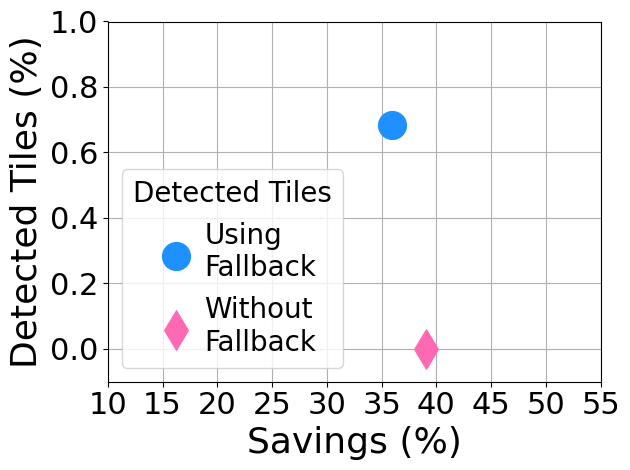

In [189]:
_colors = ['dodgerblue', "hotpink"]
_Methods = ["Using\nFallback", "Without\nFallback"]
_markers = ["o", "d"]

detectedTilesFallback = [f/o, 0/o]

# Using mean of datasets
for i in range(len(_Methods)):
    # plt.scatter(sv_f[i], ac_f[i], color=_colors[i], marker=_markers[i], label=_Methods[i], zorder=2, s=400)
    plt.scatter(sv_f[i], detectedTilesFallback[i], color=_colors[i], marker=_markers[i], label=_Methods[i], zorder=2, s=400)
ax = plt.gca()

plt.xlabel("Savings (%)", fontsize=26)
plt.ylabel("Detected Tiles (%)", fontsize=26)
plt.yticks(fontsize=22)
plt.xticks(fontsize=22)
plt.grid(True)
plt.ylim(-0.1, 1)
plt.xlim(10, 55)
plt.tight_layout()
plt.legend(fontsize=20, handletextpad=0.02, loc='lower left',  columnspacing=0.2, title="Detected Tiles", title_fontsize=20)#, bbox_to_anchor=(0.08, 1))
# plt.savefig("../assets/Plots/With_vs_without_fallback_tiles.pdf", bbox_inches = 'tight')

# Sensitivity Tests

Different tile configurations

In [291]:
_path = "/home/shubhamch/project/EdgeBTS/tileClipper/"
datasets = "differentTileConf"
tileConfs = ["2x2", "4x4", "6x6"]

tileConf_tileClipper_out = []
tileConf_yerr_tileClipper = []
tileConf_tileClipper_out_dict = {}
for tile in tileConfs:
    tileConf_tmp = []
    tileConf_l = 0
    tileConf_tileClipper_tmp_dict = {}
    for video in Path(_path+"Videos/SensitivityTests/"+datasets+"/tiled_4x4_mp4/2x2").iterdir():
        tileConf_l += 1
        tileConf_compare = mc.CaculateMetrics(datasetName=datasets, filename=video.stem, method="differentTileConf", tiles=tile)
        # print(f"For {dd}/{video.name} >>>>>>>>>>>>>>>>>>>>>\n")
        accu, f1, prec, recall = tileConf_compare.calc_metrics()
        # compare.print_difference()
        qp_saving, actual_saving, total_saving = tileConf_compare.calc_savings()
        # qp_saving, actual_saving, total_saving = tileConf_compare.calc_calibration_overhead()
        tileConf_tileClipper_tmp_dict.update({video.name: [accu, f1, prec, recall, qp_saving, actual_saving, total_saving]})
        tileConf_tmp.append([accu, f1, prec, recall, qp_saving, actual_saving, total_saving])
    # tileConf_tileClipper_out_dict[dd] = tileConf_tileClipper_tmp_dict
    tileConf_tmp = np.array(tileConf_tmp)
    tileConf_yerr_tileClipper.append(np.std(tileConf_tmp, axis=0))
    tileConf_tileClipper_out.append(tileConf_tmp.mean(axis=0))
tileConf_tileClipper_out = np.array(tileConf_tileClipper_out)
tileConf_yerr_tileClipper = np.array(tileConf_yerr_tileClipper)


In [190]:
# # BR Extraction Times
# times = np.array([[0.015920639038085938, 0.016117095947265625, 0.016348600387573242, 0.016438007354736328,   # [2x2, 4x4, 6x6]
#           0.015995264053344727, 0.016220569610595703, 0.01656484603881836, 0.01768946647644043], 
#           [0.028875112533569336, 0.029895305633544922, 0.02919292449951172, 0.02911686897277832, 
#            0.02917337417602539, 0.02908182144165039, 0.029230117797851562, 0.028844118118286133],
#            [0.052057504653930664, 0.05187273025512695, 0.05155348777770996, 0.052398681640625, 
#             0.053121089935302734, 0.05191802978515625, 0.05211663246154785, 0.05181717872619629]])

In [191]:
# mean_time = np.mean(times*1000, axis=1)
# mean_time

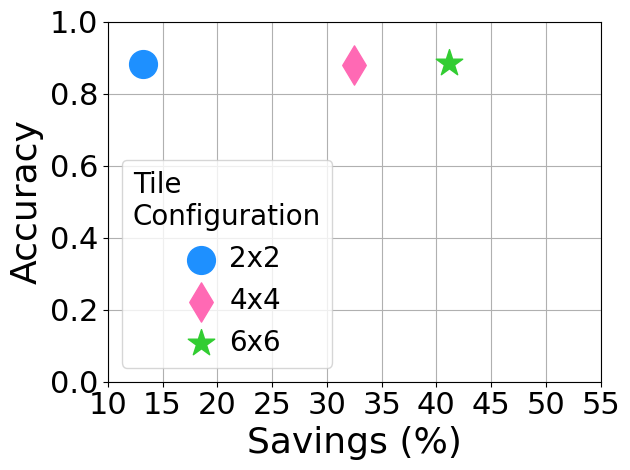

In [520]:
_colors = ['dodgerblue', "hotpink", "limegreen"]
_Methods = ["2x2", "4x4", "6x6"]
_markers = ["o", "d", "*"]

# Accu
# Usin mean of datasets
for i in range(len(_Methods)):
    plt.scatter(tileConf_tileClipper_out[i, 5], tileConf_tileClipper_out[i, 0], color=_colors[i], marker=_markers[i], label=_Methods[i], zorder=2, s=400)
ax = plt.gca()



plt.xlabel("Savings (%)", fontsize=26)
# plt.xlabel("Data Sent For Calibration (MB)", fontsize=26)
plt.ylabel("Accuracy", fontsize=26)
plt.yticks(fontsize=22)
plt.xticks(fontsize=22)
plt.grid(True)
plt.ylim(0, 1)
plt.xlim(10, 55)
plt.legend(fontsize=20, handletextpad=0.02, loc='lower left', title="Tile\nConfiguration", title_fontsize=20, columnspacing=0.2)
plt.tight_layout()
# plt.savefig("../assets/Plots/Different_tiles_A_vs_S_new.pdf", bbox_inches = 'tight')